<a href="https://colab.research.google.com/github/BrainConnection/Schroedinger-Practice/blob/main/Slinky%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Environment Setting

In [1]:
!pip install numpy
!pip install matplotlib
!pip install scipy

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 0. Ping Pong Ball Free Fall

In [3]:
tlist = np.array([(1/30)*i for i in range(27)])
ylist = np.array([1.91, 1.91, 1.87, 1.83, 1.77, 1.69, 1.62, 1.53, 1.41, 1.29,
         1.15, 1.03, 0.882, 0.731, 0.563, 0.408, 0.226, 0.0587, -0.106,
         -0.29, -0.466, -0.643, -0.833, -1, -1.17, -1.37, -1.63])

In [4]:
def func(t, b, a):
    return b - 0.5 * a * t**2
popt, pcov = curve_fit(func, tlist, ylist, p0 = [1.91, 9.8])

In [5]:
popt

array([1.74829431, 9.5306956 ])

In [6]:
pcov

array([[0.00128195, 0.00548102],
       [0.00548102, 0.04295722]])

Text(0, 0.5, 'Vertial Position')

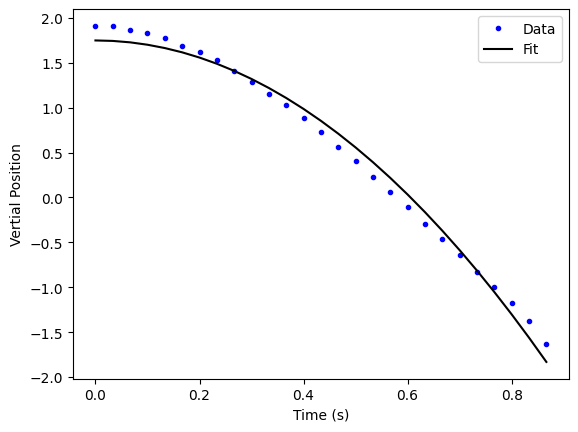

In [7]:
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, ylist, marker='.', lw=0, label = 'Data', color='blue')
ax.plot(tlist, func(tlist, popt[0], popt[1]), label = 'Fit', color='black')
ax.legend()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Vertial Position')

# 1. Point Mass Modeling (Free Fall)

### 1) Modeling

In [8]:
# Constant Initialization

N = 10                    # of point mass
omega = 2 * np.pi * 10   # w**2 := k/m, Hz
g = 9.8                   # m/s**2
L_0 = 0.02             # natural length

delta = g / omega ** 2    # stationary length

t_step = 100000
tlist = np.linspace(0,2,t_step)

In [9]:
# Position initialization

lst = []
for i in range(N+1):

    lst.append([-(i*N-(i-1)*i/2)*delta - i*L_0])

Y_0 = np.array(lst)

In [10]:
Y_0

array([[-0.        ],
       [-0.04482369],
       [-0.08716501],
       [-0.12702396],
       [-0.16440055],
       [-0.19929476],
       [-0.2317066 ],
       [-0.26163608],
       [-0.28908319],
       [-0.31404793],
       [-0.33653029]])

In [11]:
# Matrix A Construction & Diagonalization

lst = []

for i in range(N+1):

  if i==0:
    sub_lst = []
    for j in range(N+1):

      if j==0:
        sub_lst.append(-1)

      elif j==1:
        sub_lst.append(+1)

      else:
        sub_lst.append(0)

  elif i==N:
    sub_lst = []
    for j in range(N+1):

      if j==N-1:
        sub_lst.append(+1)

      elif j==N:
        sub_lst.append(-1)

      else:
        sub_lst.append(0)

  else:
    sub_lst = []
    for j in range(N+1):

      if j==i-1:
        sub_lst.append(+1)

      elif j==i:
        sub_lst.append(-2)

      elif j==i+1:
        sub_lst.append(+1)

      else:
        sub_lst.append(0)

  lst.append(sub_lst)

A = np.array(lst)

In [12]:
A

array([[-1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1, -2,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, -2,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, -2,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1, -2,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1, -2,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1, -2,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1, -2,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1, -2,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, -2,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1, -1]])

In [13]:
D, P = np.linalg.eig(A)
P_dag = np.linalg.inv(P)

for i in range(N+1):
  if D[i] > -0.0000000001:
    N_crit = i

In [14]:
N_crit

8

In [15]:
D

array([-3.91898595e+00, -3.68250707e+00, -3.30972147e+00, -2.83083003e+00,
       -2.28462968e+00, -1.71537032e+00, -1.16916997e+00, -6.90278532e-01,
        4.39245429e-16, -8.10140528e-02, -3.17492934e-01])

In [16]:
P

array([[-6.06832509e-02, -1.20131166e-01, -1.77133557e-01,
        -2.30530019e-01, -2.79233555e-01, -3.22252701e-01,
        -3.58711712e-01, -3.87868386e-01,  3.01511345e-01,
         4.22061281e-01,  4.09129179e-01],
       [ 1.77133557e-01,  3.22252701e-01,  4.09129179e-01,
         4.22061281e-01,  3.58711712e-01,  2.30530019e-01,
         6.06832509e-02, -1.20131166e-01,  3.01511345e-01,
         3.87868386e-01,  2.79233555e-01],
       [-2.79233555e-01, -4.22061281e-01, -3.58711712e-01,
        -1.20131166e-01,  1.77133557e-01,  3.87868386e-01,
         4.09129179e-01,  2.30530019e-01,  3.01511345e-01,
         3.22252701e-01,  6.06832509e-02],
       [ 3.58711712e-01,  3.87868386e-01,  6.06832509e-02,
        -3.22252701e-01, -4.09129179e-01, -1.20131166e-01,
         2.79233555e-01,  4.22061281e-01,  3.01511345e-01,
         2.30530019e-01, -1.77133557e-01],
       [-4.09129179e-01, -2.30530019e-01,  2.79233555e-01,
         3.87868386e-01, -6.06832509e-02, -4.22061281e-01,
  

In [17]:
P_dag

array([[-6.06832509e-02,  1.77133557e-01, -2.79233555e-01,
         3.58711712e-01, -4.09129179e-01,  4.26401433e-01,
        -4.09129179e-01,  3.58711712e-01, -2.79233555e-01,
         1.77133557e-01, -6.06832509e-02],
       [-1.20131166e-01,  3.22252701e-01, -4.22061281e-01,
         3.87868386e-01, -2.30530019e-01, -4.47181304e-15,
         2.30530019e-01, -3.87868386e-01,  4.22061281e-01,
        -3.22252701e-01,  1.20131166e-01],
       [-1.77133557e-01,  4.09129179e-01, -3.58711712e-01,
         6.06832509e-02,  2.79233555e-01, -4.26401433e-01,
         2.79233555e-01,  6.06832509e-02, -3.58711712e-01,
         4.09129179e-01, -1.77133557e-01],
       [-2.30530019e-01,  4.22061281e-01, -1.20131166e-01,
        -3.22252701e-01,  3.87868386e-01,  4.89641465e-16,
        -3.87868386e-01,  3.22252701e-01,  1.20131166e-01,
        -4.22061281e-01,  2.30530019e-01],
       [-2.79233555e-01,  3.58711712e-01,  1.77133557e-01,
        -4.09129179e-01, -6.06832509e-02,  4.26401433e-01,
  

In [18]:
X_0 = np.matmul(P_dag, Y_0)

In [19]:
X_0

array([[-4.22818671e-04],
       [-2.19566594e-03],
       [-1.46139770e-03],
       [-5.48110163e-03],
       [-3.33741963e-03],
       [-1.26442431e-02],
       [-8.37774094e-03],
       [-3.78193602e-02],
       [-6.19820509e-01],
       [ 3.50646345e-01],
       [ 3.51872570e-02]])

In [20]:
X_0[N_crit][0]

-0.6198205086943424

In [21]:
lst = []
for i in range(N+1):

  if i==0:
    lst.append([g - omega**2 * L_0])

  elif i==N:
    lst.append([g + omega**2 * L_0])

  else:
    lst.append([g])

G = np.array(lst)

H = np.matmul(P_dag, G)

In [22]:
G

array([[-69.15683521],
       [  9.8       ],
       [  9.8       ],
       [  9.8       ],
       [  9.8       ],
       [  9.8       ],
       [  9.8       ],
       [  9.8       ],
       [  9.8       ],
       [  9.8       ],
       [ 88.75683521]])

In [23]:
H

array([[ 3.73034936e-14],
       [ 1.89703533e+01],
       [-1.42108547e-13],
       [ 3.64038415e+01],
       [-6.03961325e-14],
       [ 5.08881069e+01],
       [ 6.75015599e-14],
       [ 6.12497205e+01],
       [ 3.25029229e+01],
       [-6.66492460e+01],
       [-4.26325641e-14]])

In [24]:
lst = []
for i in range(N+1):
  lst.append([X_0[i][0]+H[i][0]/(-D[i] * omega**2)])

A_coeff = np.array(lst)

In [25]:
A_coeff

array([[-4.22818671e-04],
       [-8.90781374e-04],
       [-1.46139770e-03],
       [-2.22368219e-03],
       [-3.33741963e-03],
       [-5.12976770e-03],
       [-8.37774094e-03],
       [-1.53433093e-02],
       [-1.87437046e+13],
       [ 1.42257174e-01],
       [ 3.51872570e-02]])

In [26]:
lst = []

for i in range(N+1):

  if i != N_crit:
    sub_arr = A_coeff[i] * np.cos(np.sqrt(-D[i]) * omega * tlist) - H[i][0]/(-D[i] * omega**2)

  elif i == N_crit:
    sub_arr = X_0[i][0] -0.5*H[i][0]*tlist**2

  lst.append(sub_arr)

X = np.array(lst)

In [27]:
X

array([[-4.22818671e-04, -4.22817363e-04, -4.22813438e-04, ...,
         3.54026934e-04,  3.53450748e-04,  3.52872375e-04],
       [-2.19566594e-03, -2.19566335e-03, -2.19565558e-03, ...,
        -6.59564754e-04, -6.58085862e-04, -6.56610731e-04],
       [-1.46139770e-03, -1.46139388e-03, -1.46138243e-03, ...,
         1.09348647e-03,  1.09570011e-03,  1.09790802e-03],
       ...,
       [-6.19820509e-01, -6.19820515e-01, -6.19820535e-01, ...,
        -6.56230662e+01, -6.56243663e+01, -6.56256664e+01],
       [ 3.50646345e-01,  3.50646336e-01,  3.50646308e-01, ...,
         1.58087846e-01,  1.58135445e-01,  1.58183050e-01],
       [ 3.51872570e-02,  3.51872482e-02,  3.51872217e-02, ...,
        -4.20757934e-03, -4.23231485e-03, -4.25704823e-03]])

In [28]:
lst = []

for i in range(N+1):
  lst.append([])

for i in range(t_step):

  sub_lst = []

  for j in range(N+1):
    sub_lst.append([X[j][i]])

  sub_x = np.array(sub_lst)
  sub_y = np.matmul(P, sub_x)

  for j in range(N+1):
    lst[j].append(sub_y[j][0])

Y = np.array(lst)

In [29]:
Y

array([[-6.93889390e-18, -2.15604284e-08, -8.62416795e-08, ...,
        -1.97155098e+01, -1.97158888e+01, -1.97162677e+01],
       [-4.48236900e-02, -4.48236900e-02, -4.48236900e-02, ...,
        -1.97270886e+01, -1.97274645e+01, -1.97278404e+01],
       [-8.71650110e-02, -8.71650110e-02, -8.71650110e-02, ...,
        -1.97391933e+01, -1.97395738e+01, -1.97399544e+01],
       ...,
       [-2.89083188e-01, -2.89083188e-01, -2.89083188e-01, ...,
        -1.98298089e+01, -1.98302210e+01, -1.98306331e+01],
       [-3.14047926e-01, -3.14047926e-01, -3.14047926e-01, ...,
        -1.98460301e+01, -1.98464469e+01, -1.98468637e+01],
       [-3.36530295e-01, -3.36530295e-01, -3.36530295e-01, ...,
        -1.98645651e+01, -1.98649888e+01, -1.98654125e+01]])

### 2) Plot

Text(0, 0.5, 'Vertical Postion')

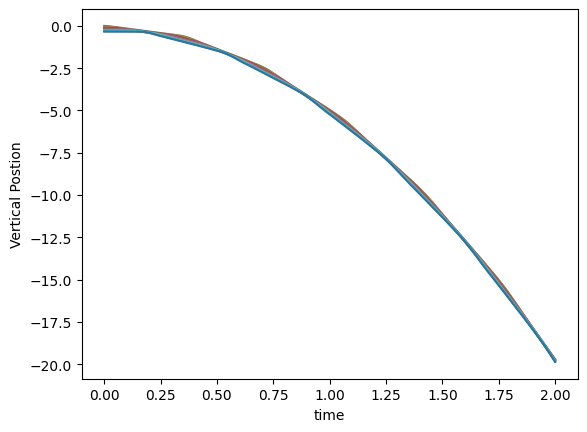

In [30]:
plt.figure()

for i in range(N+1):
  plt.plot(tlist, Y[i], label = '{0}'.format(i))

plt.xlabel('time')
plt.ylabel('Vertical Postion')

Text(0, 0.5, 'Vertial Position (m)')

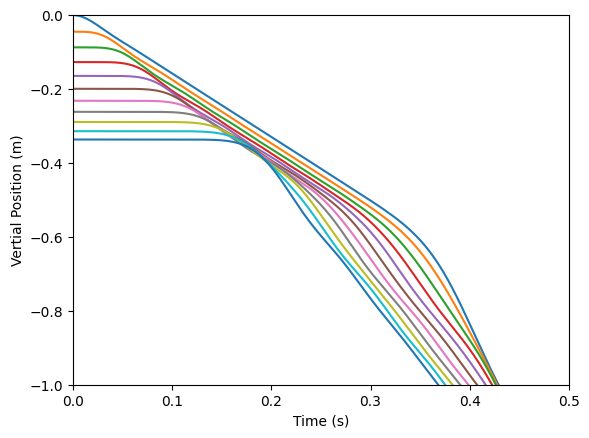

In [31]:
plt.figure()

for i in range(N+1):
  plt.plot(tlist, Y[i], label = '{0}'.format(i))

plt.xlim(0,0.5)
plt.ylim(-1,0)
plt.xlabel('Time (s)')
plt.ylabel('Vertial Position (m)')

Text(0, 0.5, 'Vertial Position (m)')

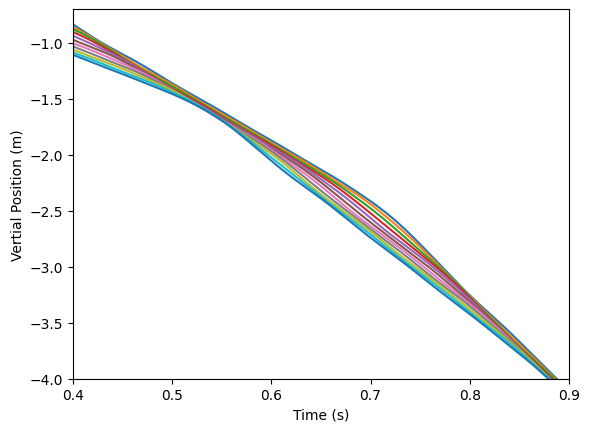

In [32]:
plt.figure()

for i in range(N+1):
  plt.plot(tlist, Y[i], label = '{0}'.format(i))

plt.xlim(0.4,0.9)
plt.ylim(-4,-0.7)
plt.xlabel('Time (s)')
plt.ylabel('Vertial Position (m)')

# 2. Free Fall Analysis

## 1) Short Plastic Slinky

In [33]:
# Short Plastic Slinky

tlist = np.array([(1/30)*i for i in range(13)])
ylist1 = np.array([0.0, -0.0437, -0.1758, -0.2807, -0.3922, -0.5037, -0.6205, -0.7147, -0.8132, -0.8867, -0.9766, -1.0662, -1.1723])
ylist2 = np.array([-0.0952, -0.1061, -0.3102, -0.3271, -0.4097, -0.5199, -0.6378, -0.7327, -0.826, -0.9026, -0.9913, -1.0969, -1.2163])
ylist3 = np.array([-0.3179, -0.3148, -0.3102, -0.3301, -0.4113, -0.5184, -0.6439, -0.7403, -0.8337, -0.9209, -1.0036, -1.1168, -1.2323])
ylist4 = np.array([-0.4419, -0.4342, -0.4342, -0.4281, -0.4419, -0.5444, -0.6546, -0.751, -0.8459, -0.9362, -1.0143, -1.1505, -1.2515])
ylist5 = np.array([-0.673, -0.673, -0.673, -0.673, -0.6776, -0.6806, -0.676, -0.7648, -0.8597, -0.9561, -1.0602, -1.1888, -1.3035])

In [34]:
# Constant Initialization

L = 0.92                          # total strengthen lengh
l = 0.05                          # total natural length

N = 2000                          # of point mass
g = 9.8                           # m/s**2
l_0 = l/N                         # natural length of spring between point mass

In [35]:
delta_L = L - l
omega = np.sqrt(N*(N+1)*4.9/delta_L)
delta = g / omega ** 2            # stationary length unit

Nlist = []

root_arr = np.roots([delta/2,-(N*delta+delta/2+l_0),-ylist1[0]])
if root_arr[0] > 0 and root_arr[0] < N:
  Nlist.append((int)(root_arr[0]))
else:
  Nlist.append((int)(root_arr[1]))

root_arr = np.roots([delta/2,-(N*delta+delta/2+l_0),-ylist2[0]])
if root_arr[0] > 0 and root_arr[0] < N:
  Nlist.append((int)(root_arr[0]))
else:
  Nlist.append((int)(root_arr[1]))

root_arr = np.roots([delta/2,-(N*delta+delta/2+l_0),-ylist3[0]])
if root_arr[0] > 0 and root_arr[0] < N:
  Nlist.append((int)(root_arr[0]))
else:
  Nlist.append((int)(root_arr[1]))

root_arr = np.roots([delta/2,-(N*delta+delta/2+l_0),-ylist4[0]])
if root_arr[0] > 0 and root_arr[0] < N:
  Nlist.append((int)(root_arr[0]))
else:
  Nlist.append((int)(root_arr[1]))

root_arr = np.roots([delta/2,-(N*delta+delta/2+l_0),-ylist5[0]])
if root_arr[0] > 0 and root_arr[0] < N:
  Nlist.append((int)(root_arr[0]))
else:
  Nlist.append((int)(root_arr[1]))

In [36]:
Nlist

[0, 109, 392, 573, 990]

In [37]:
# Position initialization

lst = []
for i in range(N+1):

    lst.append([-(i*N-(i-1)*i/2)*delta - i*l_0])

Y_0 = np.array(lst)

In [38]:
# Matrix A Construction & Diagonalization

lst = []

for i in range(N+1):

  if i==0:
    sub_lst = []
    for j in range(N+1):

      if j==0:
        sub_lst.append(-1)

      elif j==1:
        sub_lst.append(+1)

      else:
        sub_lst.append(0)

  elif i==N:
    sub_lst = []
    for j in range(N+1):

      if j==N-1:
        sub_lst.append(+1)

      elif j==N:
        sub_lst.append(-1)

      else:
        sub_lst.append(0)

  else:
    sub_lst = []
    for j in range(N+1):

      if j==i-1:
        sub_lst.append(+1)

      elif j==i:
        sub_lst.append(-2)

      elif j==i+1:
        sub_lst.append(+1)

      else:
        sub_lst.append(0)

  lst.append(sub_lst)

A = np.array(lst)

In [39]:
D, P = np.linalg.eig(A)
P_dag = np.linalg.inv(P)

for i in range(N+1):
  if D[i] > -0.0000000001:
    N_crit = i

In [40]:
X_0 = np.matmul(P_dag, Y_0)

In [41]:
lst = []
for i in range(N+1):

  if i==0:
    lst.append([g - omega**2 * l_0])

  elif i==N:
    lst.append([g + omega**2 * l_0])

  else:
    lst.append([g])

G = np.array(lst)

H = np.matmul(P_dag, G)

In [42]:
lst = []
for i in range(N+1):
  lst.append([X_0[i][0]+H[i][0]/(-D[i] * omega**2)])

A_coeff = np.array(lst)

In [43]:
lst = []

for i in range(N+1):

  if i != N_crit:
    sub_arr = A_coeff[i] * np.cos(np.sqrt(-D[i]) * omega * tlist) - H[i][0]/(-D[i] * omega**2)

  elif i == N_crit:
    sub_arr = X_0[i][0] -0.5*H[i][0]*tlist**2

  lst.append(sub_arr)

X = np.array(lst)

In [44]:
lst = []

for i in range(N+1):
  lst.append([])

for i in range(np.size(tlist)):

  sub_lst = []

  for j in range(N+1):
    sub_lst.append([X[j][i]])

  sub_x = np.array(sub_lst)
  sub_y = np.matmul(P, sub_x)

  for j in range(N+1):
    lst[j].append(sub_y[j][0])

Y = np.array(lst)

Text(0, 0.5, 'Vertial Position (m)')

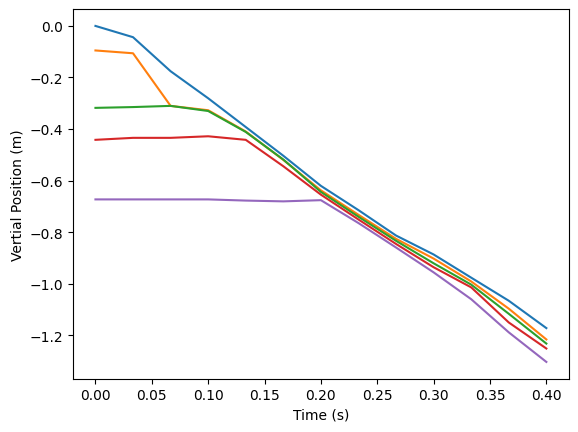

In [45]:
plt.figure()

plt.plot(tlist, ylist1)
plt.plot(tlist, ylist2)
plt.plot(tlist, ylist3)
plt.plot(tlist, ylist4)
plt.plot(tlist, ylist5)

plt.xlabel('Time (s)')
plt.ylabel('Vertial Position (m)')

Text(0, 0.5, 'Vertical Postion')

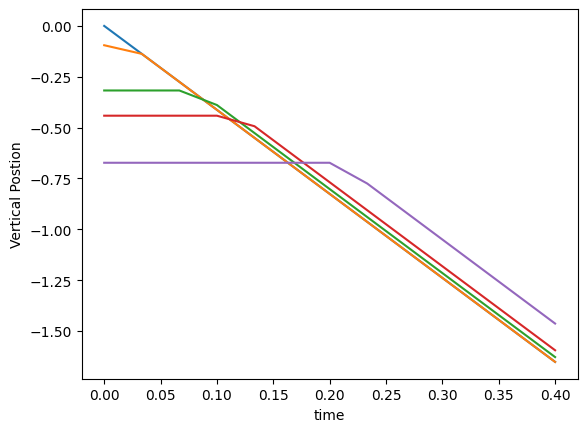

In [46]:
plt.figure()

for i in range(5):
  plt.plot(tlist, Y[Nlist[i]])

plt.xlabel('time')
plt.ylabel('Vertical Postion')

Text(0, 0.5, 'Vertial Position, 1')

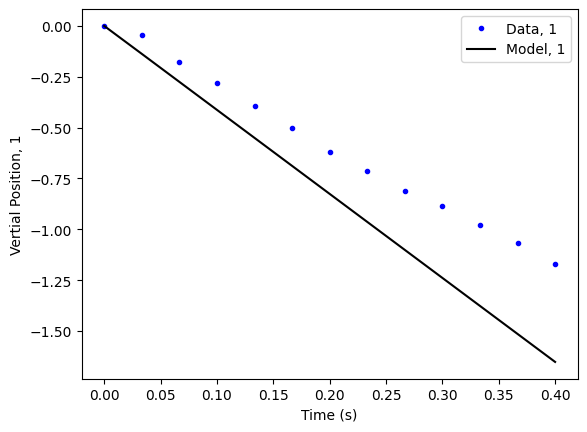

In [47]:
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, ylist1, marker='.', lw=0, label = 'Data, 1', color='blue')
ax.plot(tlist, Y[Nlist[0]], label = 'Model, 1', color='black')
ax.legend()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Vertial Position, 1')

Text(0, 0.5, 'Vertial Position, 1')

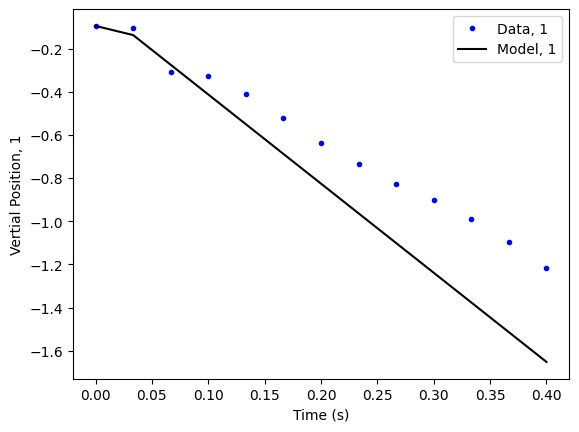

In [48]:
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, ylist2, marker='.', lw=0, label = 'Data, 1', color='blue')
ax.plot(tlist, Y[Nlist[1]], label = 'Model, 1', color='black')
ax.legend()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Vertial Position, 1')

Text(0, 0.5, 'Vertial Position, 1')

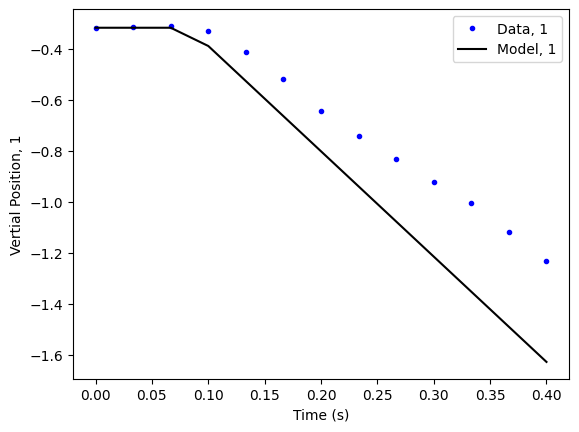

In [49]:
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, ylist3, marker='.', lw=0, label = 'Data, 1', color='blue')
ax.plot(tlist, Y[Nlist[2]], label = 'Model, 1', color='black')
ax.legend()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Vertial Position, 1')

Text(0, 0.5, 'Vertial Position, 1')

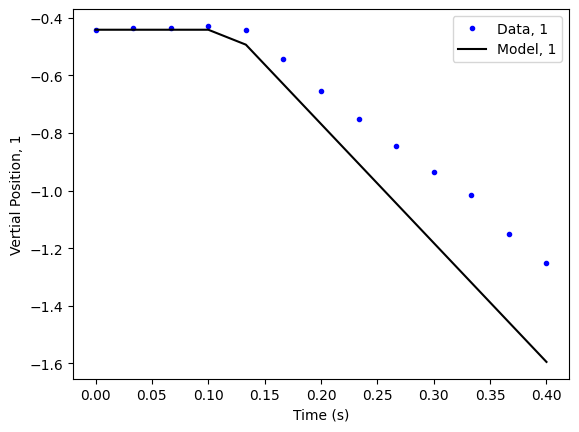

In [50]:
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, ylist4, marker='.', lw=0, label = 'Data, 1', color='blue')
ax.plot(tlist, Y[Nlist[3]], label = 'Model, 1', color='black')
ax.legend()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Vertial Position, 1')

Text(0, 0.5, 'Vertial Position, 1')

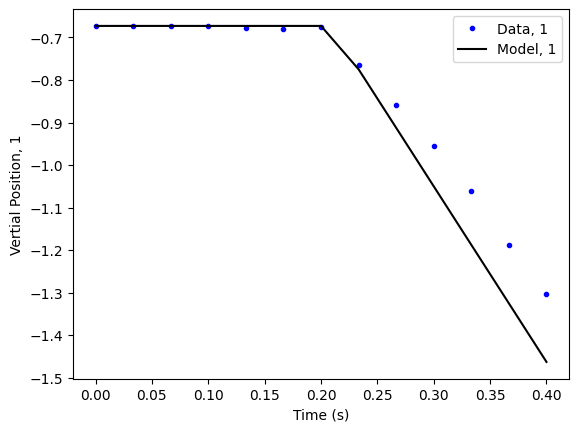

In [51]:
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, ylist5, marker='.', lw=0, label = 'Data, 1', color='blue')
ax.plot(tlist, Y[Nlist[4]], label = 'Model, 1', color='black')
ax.legend()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Vertial Position, 1')

## 2) Long Plastic Slinky

In [52]:
# Long Plastic Slinky

tlist = np.array([0.0, 0.04167, 0.08333, 0.125, 0.16667, 0.20833, 0.25, 0.29167, 0.33333, 0.375, 0.41667])
ylist1 = np.array([0.0, -0.029099999999999904, -0.09144999999999992, -0.43855999999999995, -0.61108, -0.7482599999999999, -0.9020699999999999, -1.17435, -1.29698, -1.4113, -1.58144])
ylist2 = np.array([-0.67751, -0.6731, -0.67604, -0.6731, -0.69956, -0.7833399999999999, -0.92297, -1.19341, -1.31247, -1.4271099999999999, -1.55351])
ylist3 = np.array([-1.05525, -1.05525, -1.0567199999999999, -1.05378, -1.05819, -1.05378, -1.06407, -1.2095799999999999, -1.33304, -1.4521, -1.56821])
ylist4 = np.array([-1.44363, -1.44363, -1.44363, -1.44363, -1.44363, -1.44363, -1.44363, -1.44363, -1.43993, -1.4732699999999999, -1.59737])

In [53]:
# Constant Initialization

L = 1.90                          # total strengthen lengh
l = 0.1                           # total natural length

N = 2000                          # of point mass
g = 9.8                           # m/s**2
l_0 = l/N                         # natural length of spring between point mass

In [54]:
delta_L = L - l
omega = np.sqrt(N*(N+1)*4.9/delta_L)
delta = g / omega ** 2            # stationary length unit

Nlist = []

root_arr = np.roots([delta/2,-(N*delta+delta/2+l_0),-ylist1[0]])
if root_arr[0] > 0 and root_arr[0] < N:
  Nlist.append((int)(root_arr[0]))
else:
  Nlist.append((int)(root_arr[1]))

root_arr = np.roots([delta/2,-(N*delta+delta/2+l_0),-ylist2[0]])
if root_arr[0] > 0 and root_arr[0] < N:
  Nlist.append((int)(root_arr[0]))
else:
  Nlist.append((int)(root_arr[1]))

root_arr = np.roots([delta/2,-(N*delta+delta/2+l_0),-ylist3[0]])
if root_arr[0] > 0 and root_arr[0] < N:
  Nlist.append((int)(root_arr[0]))
else:
  Nlist.append((int)(root_arr[1]))

root_arr = np.roots([delta/2,-(N*delta+delta/2+l_0),-ylist4[0]])
if root_arr[0] > 0 and root_arr[0] < N:
  Nlist.append((int)(root_arr[0]))
else:
  Nlist.append((int)(root_arr[1]))

In [55]:
Nlist

[0, 406, 684, 1047]

In [56]:
# Position initialization

lst = []
for i in range(N+1):

    lst.append([-(i*N-(i-1)*i/2)*delta - i*l_0])

Y_0 = np.array(lst)

In [57]:
# Matrix A Construction & Diagonalization

lst = []

for i in range(N+1):

  if i==0:
    sub_lst = []
    for j in range(N+1):

      if j==0:
        sub_lst.append(-1)

      elif j==1:
        sub_lst.append(+1)

      else:
        sub_lst.append(0)

  elif i==N:
    sub_lst = []
    for j in range(N+1):

      if j==N-1:
        sub_lst.append(+1)

      elif j==N:
        sub_lst.append(-1)

      else:
        sub_lst.append(0)

  else:
    sub_lst = []
    for j in range(N+1):

      if j==i-1:
        sub_lst.append(+1)

      elif j==i:
        sub_lst.append(-2)

      elif j==i+1:
        sub_lst.append(+1)

      else:
        sub_lst.append(0)

  lst.append(sub_lst)

A = np.array(lst)

In [58]:
D, P = np.linalg.eig(A)
P_dag = np.linalg.inv(P)

for i in range(N+1):
  if D[i] > -0.0000000001:
    N_crit = i

In [59]:
X_0 = np.matmul(P_dag, Y_0)

In [60]:
lst = []
for i in range(N+1):

  if i==0:
    lst.append([g - omega**2 * l_0])

  elif i==N:
    lst.append([g + omega**2 * l_0])

  else:
    lst.append([g])

G = np.array(lst)

H = np.matmul(P_dag, G)

In [61]:
lst = []
for i in range(N+1):
  lst.append([X_0[i][0]+H[i][0]/(-D[i] * omega**2)])

A_coeff = np.array(lst)

In [62]:
lst = []

for i in range(N+1):

  if i != N_crit:
    sub_arr = A_coeff[i] * np.cos(np.sqrt(-D[i]) * omega * tlist) - H[i][0]/(-D[i] * omega**2)

  elif i == N_crit:
    sub_arr = X_0[i][0] -0.5*H[i][0]*tlist**2

  lst.append(sub_arr)

X = np.array(lst)

In [63]:
lst = []

for i in range(N+1):
  lst.append([])

for i in range(np.size(tlist)):

  sub_lst = []

  for j in range(N+1):
    sub_lst.append([X[j][i]])

  sub_x = np.array(sub_lst)
  sub_y = np.matmul(P, sub_x)

  for j in range(N+1):
    lst[j].append(sub_y[j][0])

Y = np.array(lst)

Text(0, 0.5, 'Vertial Position (m)')

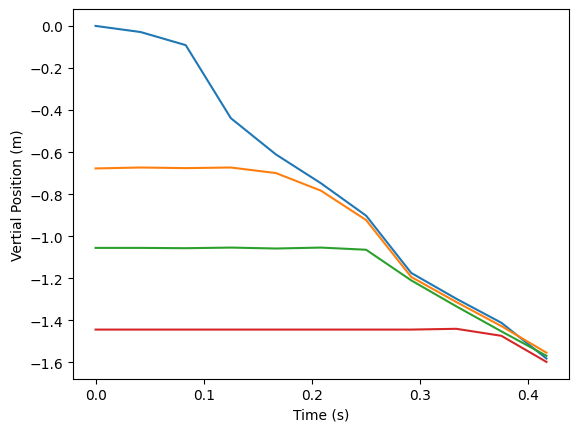

In [64]:
plt.figure()

plt.plot(tlist, ylist1)
plt.plot(tlist, ylist2)
plt.plot(tlist, ylist3)
plt.plot(tlist, ylist4)

plt.xlabel('Time (s)')
plt.ylabel('Vertial Position (m)')

Text(0, 0.5, 'Vertical Postion')

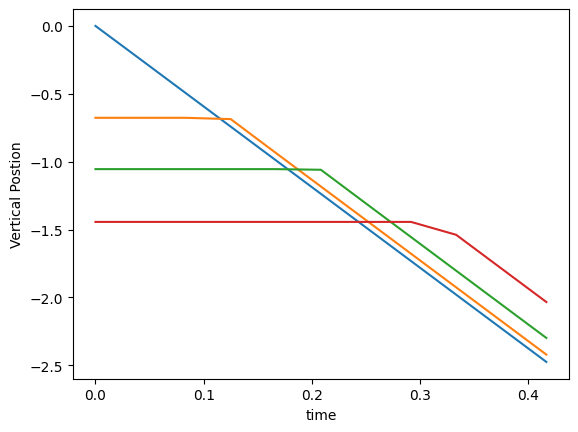

In [65]:
plt.figure()

for i in range(4):
  plt.plot(tlist, Y[Nlist[i]])

plt.xlabel('time')
plt.ylabel('Vertical Postion')

Text(0, 0.5, 'Vertial Position, 1')

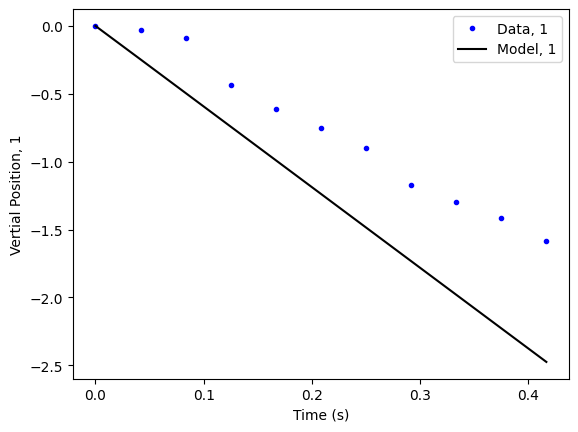

In [66]:
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, ylist1, marker='.', lw=0, label = 'Data, 1', color='blue')
ax.plot(tlist, Y[Nlist[0]], label = 'Model, 1', color='black')
ax.legend()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Vertial Position, 1')

Text(0, 0.5, 'Vertial Position, 1')

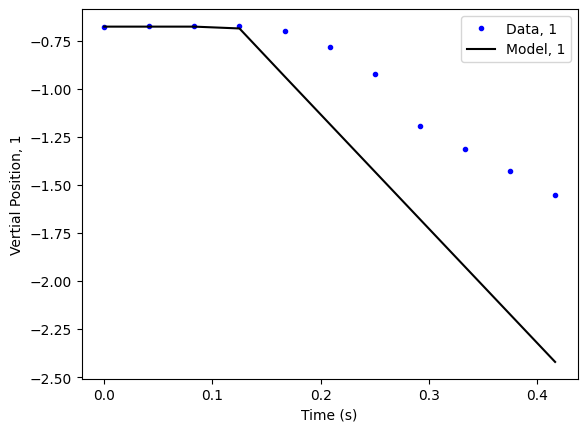

In [67]:
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, ylist2, marker='.', lw=0, label = 'Data, 1', color='blue')
ax.plot(tlist, Y[Nlist[1]], label = 'Model, 1', color='black')
ax.legend()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Vertial Position, 1')

Text(0, 0.5, 'Vertial Position, 1')

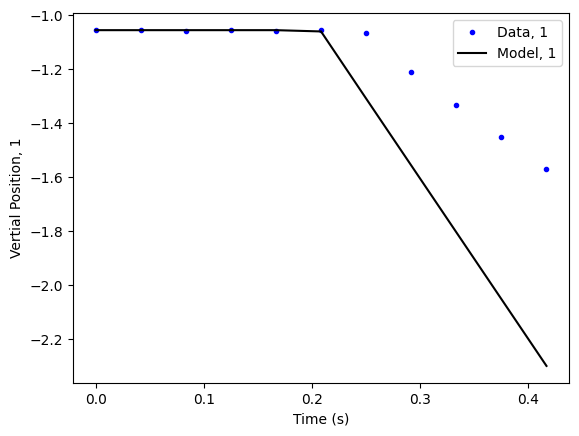

In [68]:
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, ylist3, marker='.', lw=0, label = 'Data, 1', color='blue')
ax.plot(tlist, Y[Nlist[2]], label = 'Model, 1', color='black')
ax.legend()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Vertial Position, 1')

Text(0, 0.5, 'Vertial Position, 1')

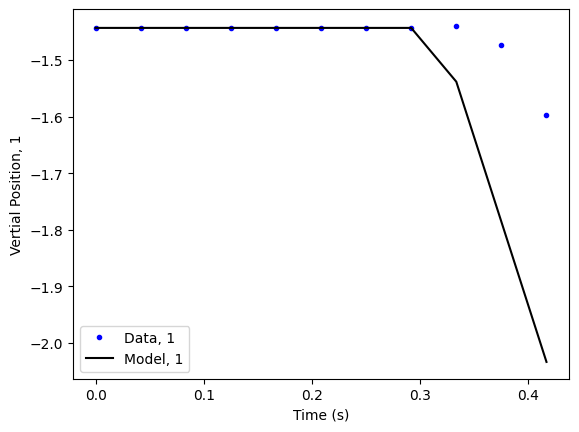

In [69]:
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, ylist4, marker='.', lw=0, label = 'Data, 1', color='blue')
ax.plot(tlist, Y[Nlist[3]], label = 'Model, 1', color='black')
ax.legend()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Vertial Position, 1')

## 3) Short Metal Slinky

In [70]:
# Short Metal Slinky

tlist = np.array([0.0, 0.03333, 0.06667, 0.1, 0.13333, 0.16667, 0.2, 0.23333, 0.26667, 0.3])
ylist1 = np.array([0.0, -0.09033000000000002, -0.21717999999999993, -0.35364999999999996, -0.47858, -0.61312, -0.73228, -0.84376, -0.9437, -1.02827])
ylist2 = np.array([-0.20180999999999993, -0.20372999999999997, -0.23256, -0.37287, -0.49779999999999996, -0.6381, -0.74958, -0.86874, -0.961, -1.05133])
ylist3 = np.array([-0.38824, -0.39593, -0.39593, -0.39785, -0.52855, -0.65924, -0.76295, -0.8803799999999999, -0.97493, -1.06415])
ylist4 = np.array([-0.61959, -0.61959, -0.62112, -0.62798, -0.6317999999999999, -0.6684, -0.7782, -0.8948699999999999, -0.98713, -1.0794])

In [71]:
# Constant Initialization

L = 1.00                          # total strengthen lengh
l = 0.05                          # total natural length

N = 2000                          # of point mass
g = 9.8                           # m/s**2
l_0 = l/N                         # natural length of spring between point mass

In [72]:
delta_L = L - l
omega = np.sqrt(N*(N+1)*4.9/delta_L)
delta = g / omega ** 2            # stationary length unit

Nlist = []

root_arr = np.roots([delta/2,-(N*delta+delta/2+l_0),-ylist1[0]])
if root_arr[0] > 0 and root_arr[0] < N:
  Nlist.append((int)(root_arr[0]))
else:
  Nlist.append((int)(root_arr[1]))

root_arr = np.roots([delta/2,-(N*delta+delta/2+l_0),-ylist2[0]])
if root_arr[0] > 0 and root_arr[0] < N:
  Nlist.append((int)(root_arr[0]))
else:
  Nlist.append((int)(root_arr[1]))

root_arr = np.roots([delta/2,-(N*delta+delta/2+l_0),-ylist3[0]])
if root_arr[0] > 0 and root_arr[0] < N:
  Nlist.append((int)(root_arr[0]))
else:
  Nlist.append((int)(root_arr[1]))

root_arr = np.roots([delta/2,-(N*delta+delta/2+l_0),-ylist4[0]])
if root_arr[0] > 0 and root_arr[0] < N:
  Nlist.append((int)(root_arr[0]))
else:
  Nlist.append((int)(root_arr[1]))

root_arr = np.roots([delta/2,-(N*delta+delta/2+l_0),-ylist5[0]])
if root_arr[0] > 0 and root_arr[0] < N:
  Nlist.append((int)(root_arr[0]))
else:
  Nlist.append((int)(root_arr[1]))

In [73]:
Nlist

[0, 218, 446, 786, 878]

In [74]:
# Position initialization

lst = []
for i in range(N+1):

    lst.append([-(i*N-(i-1)*i/2)*delta - i*l_0])

Y_0 = np.array(lst)

In [75]:
# Matrix A Construction & Diagonalization

lst = []

for i in range(N+1):

  if i==0:
    sub_lst = []
    for j in range(N+1):

      if j==0:
        sub_lst.append(-1)

      elif j==1:
        sub_lst.append(+1)

      else:
        sub_lst.append(0)

  elif i==N:
    sub_lst = []
    for j in range(N+1):

      if j==N-1:
        sub_lst.append(+1)

      elif j==N:
        sub_lst.append(-1)

      else:
        sub_lst.append(0)

  else:
    sub_lst = []
    for j in range(N+1):

      if j==i-1:
        sub_lst.append(+1)

      elif j==i:
        sub_lst.append(-2)

      elif j==i+1:
        sub_lst.append(+1)

      else:
        sub_lst.append(0)

  lst.append(sub_lst)

A = np.array(lst)

In [76]:
D, P = np.linalg.eig(A)
P_dag = np.linalg.inv(P)

for i in range(N+1):
  if D[i] > -0.0000000001:
    N_crit = i

In [77]:
X_0 = np.matmul(P_dag, Y_0)

In [78]:
lst = []
for i in range(N+1):

  if i==0:
    lst.append([g - omega**2 * l_0])

  elif i==N:
    lst.append([g + omega**2 * l_0])

  else:
    lst.append([g])

G = np.array(lst)

H = np.matmul(P_dag, G)

In [79]:
lst = []
for i in range(N+1):
  lst.append([X_0[i][0]+H[i][0]/(-D[i] * omega**2)])

A_coeff = np.array(lst)

In [80]:
lst = []

for i in range(N+1):

  if i != N_crit:
    sub_arr = A_coeff[i] * np.cos(np.sqrt(-D[i]) * omega * tlist) - H[i][0]/(-D[i] * omega**2)

  elif i == N_crit:
    sub_arr = X_0[i][0] -0.5*H[i][0]*tlist**2

  lst.append(sub_arr)

X = np.array(lst)

In [81]:
lst = []

for i in range(N+1):
  lst.append([])

for i in range(np.size(tlist)):

  sub_lst = []

  for j in range(N+1):
    sub_lst.append([X[j][i]])

  sub_x = np.array(sub_lst)
  sub_y = np.matmul(P, sub_x)

  for j in range(N+1):
    lst[j].append(sub_y[j][0])

Y = np.array(lst)

Text(0, 0.5, 'Vertial Position (m)')

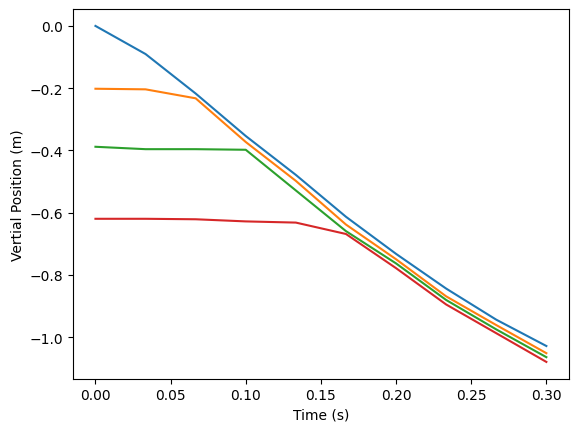

In [82]:
plt.figure()

plt.plot(tlist, ylist1)
plt.plot(tlist, ylist2)
plt.plot(tlist, ylist3)
plt.plot(tlist, ylist4)

plt.xlabel('Time (s)')
plt.ylabel('Vertial Position (m)')

Text(0, 0.5, 'Vertical Postion')

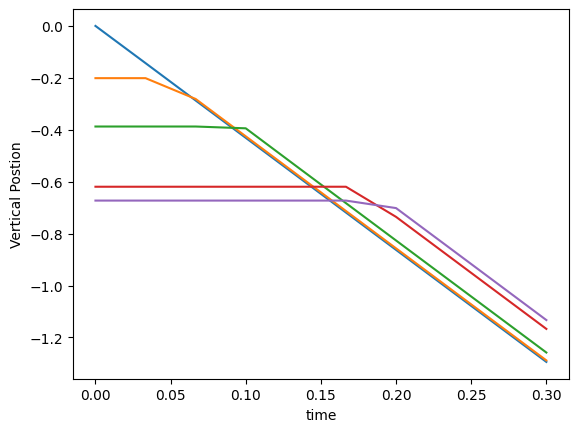

In [83]:
plt.figure()

for i in range(5):
  plt.plot(tlist, Y[Nlist[i]])

plt.xlabel('time')
plt.ylabel('Vertical Postion')

Text(0, 0.5, 'Vertial Position, 1')

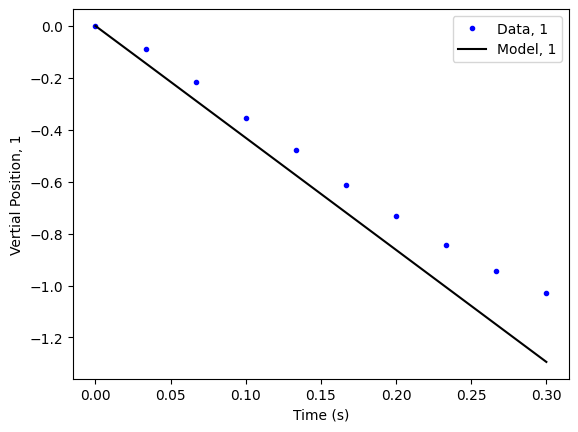

In [84]:
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, ylist1, marker='.', lw=0, label = 'Data, 1', color='blue')
ax.plot(tlist, Y[Nlist[0]], label = 'Model, 1', color='black')
ax.legend()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Vertial Position, 1')

Text(0, 0.5, 'Vertial Position, 1')

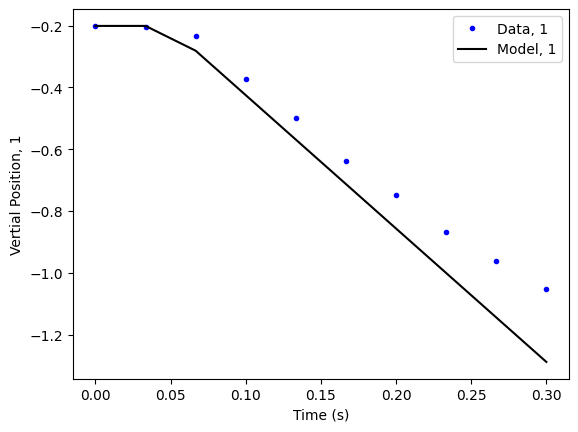

In [85]:
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, ylist2, marker='.', lw=0, label = 'Data, 1', color='blue')
ax.plot(tlist, Y[Nlist[1]], label = 'Model, 1', color='black')
ax.legend()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Vertial Position, 1')

Text(0, 0.5, 'Vertial Position, 1')

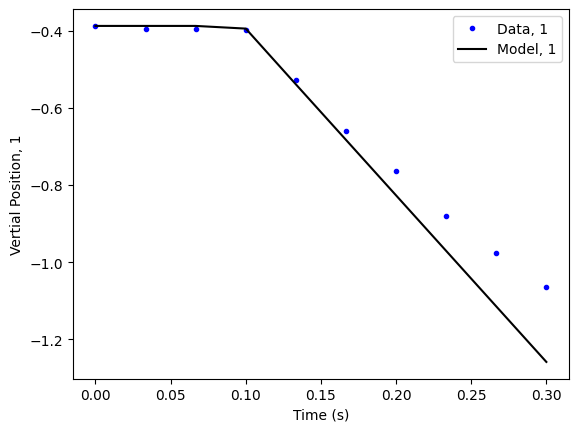

In [86]:
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, ylist3, marker='.', lw=0, label = 'Data, 1', color='blue')
ax.plot(tlist, Y[Nlist[2]], label = 'Model, 1', color='black')
ax.legend()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Vertial Position, 1')

Text(0, 0.5, 'Vertial Position, 1')

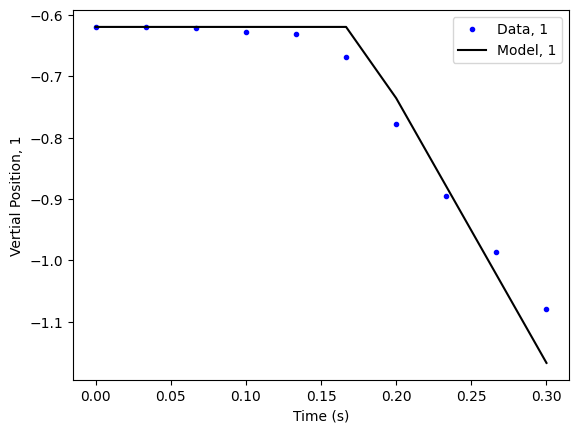

In [87]:
fig, ax = plt.subplots(1, 1)
ax.plot(tlist, ylist4, marker='.', lw=0, label = 'Data, 1', color='blue')
ax.plot(tlist, Y[Nlist[3]], label = 'Model, 1', color='black')
ax.legend()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Vertial Position, 1')

# 3. Point Mass Modeling (Transverse Wave & Longitudinal Wave)

### 1) Modeling

In [88]:
# Constant Initialization
l = 0.6
N = 100                    # of point mass
omega = 2 * np.pi * 1   # w**2 := k/m, Hz
omega_0 = 2 * np.pi * 2   # w**2 := k/m, Hz
Amp = 10

t_step = 10000
tlist = np.linspace(0,200,t_step)

In [89]:
# Position initialization

lst = []
for i in range(N-2):

    lst.append([0])

lst.append([(omega**2)*Amp])

a_0 = np.array(lst)

In [90]:
a_0

array([[  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0.        ],
       [  0

In [91]:
# Matrix A Construction & Diagonalization

lst = []

for i in range(N-1):

  if i==0:
    sub_lst = []
    for j in range(N-1):

      if j==0:
        sub_lst.append(-2)

      elif j==1:
        sub_lst.append(+1)

      else:
        sub_lst.append(0)

  elif i==N-2:
    sub_lst = []
    for j in range(N-1):

      if j==N-3:
        sub_lst.append(+1)

      elif j==N-2:
        sub_lst.append(-2)

      else:
        sub_lst.append(0)

  else:
    sub_lst = []
    for j in range(N-1):

      if j==i-1:
        sub_lst.append(+1)

      elif j==i:
        sub_lst.append(-2)

      elif j==i+1:
        sub_lst.append(+1)

      else:
        sub_lst.append(0)

  lst.append(sub_lst)

A = np.array(lst)

In [92]:
A

array([[-2,  1,  0, ...,  0,  0,  0],
       [ 1, -2,  1, ...,  0,  0,  0],
       [ 0,  1, -2, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., -2,  1,  0],
       [ 0,  0,  0, ...,  1, -2,  1],
       [ 0,  0,  0, ...,  0,  1, -2]])

In [93]:
D, P = np.linalg.eig(A)
P_dag = np.linalg.inv(P)

In [94]:
D

array([-3.99901312e+00, -3.99605346e+00, -3.99112393e+00, -3.98422940e+00,
       -3.97537668e+00, -3.96457450e+00, -3.95183352e+00, -3.93716632e+00,
       -3.83550925e+00, -3.85955297e+00, -3.88176154e+00, -3.80965410e+00,
       -3.78201305e+00, -3.75261336e+00, -3.90211303e+00, -3.72148405e+00,
       -3.58031002e+00, -3.61803399e+00, -3.54102649e+00, -3.50022214e+00,
       -3.65416115e+00, -3.45793725e+00, -3.41421356e+00, -3.36909421e+00,
       -3.92058737e+00, -3.22581411e+00, -3.17557050e+00, -3.12416676e+00,
       -3.07165359e+00, -3.27484798e+00, -3.01808283e+00, -2.96350735e+00,
       -2.90798100e+00, -2.67747584e+00, -2.73624911e+00, -2.79429578e+00,
       -2.61803399e+00, -2.55798221e+00, -2.49737977e+00, -9.86879269e-04,
       -3.94654314e-03, -8.87607079e-03, -1.57705974e-02, -2.46233188e-02,
       -2.43628648e+00, -3.54254985e-02, -4.81664761e-02, -2.37476263e+00,
       -6.28336777e-02, -9.78869674e-02, -1.18238462e-01, -1.40447028e-01,
       -1.64490749e-01, -

In [95]:
P

array([[-0.00444215, -0.00887992, -0.01330893, ...,  0.10608172,
         0.0394553 ,  0.07577735],
       [ 0.00887992,  0.0177248 ,  0.02649972, ...,  0.14030621,
         0.07577735,  0.12796187],
       [-0.01330893, -0.02649972, -0.0394553 , ...,  0.07949059,
         0.10608172,  0.14030621],
       ...,
       [-0.01330893,  0.02649972, -0.0394553 , ...,  0.07949059,
         0.10608172, -0.14030621],
       [ 0.00887992, -0.0177248 ,  0.02649972, ...,  0.14030621,
         0.07577735, -0.12796187],
       [-0.00444215,  0.00887992, -0.01330893, ...,  0.10608172,
         0.0394553 , -0.07577735]])

In [96]:
P_dag

array([[-0.00444215,  0.00887992, -0.01330893, ..., -0.01330893,
         0.00887992, -0.00444215],
       [-0.00887992,  0.0177248 , -0.02649972, ...,  0.02649972,
        -0.0177248 ,  0.00887992],
       [-0.01330893,  0.02649972, -0.0394553 , ..., -0.0394553 ,
         0.02649972, -0.01330893],
       ...,
       [ 0.10608172,  0.14030621,  0.07949059, ...,  0.07949059,
         0.14030621,  0.10608172],
       [ 0.0394553 ,  0.07577735,  0.10608172, ...,  0.10608172,
         0.07577735,  0.0394553 ],
       [ 0.07577735,  0.12796187,  0.14030621, ..., -0.14030621,
        -0.12796187, -0.07577735]])

In [97]:
f_0 = np.matmul(P_dag, a_0)

In [98]:
f_0

array([[ -1.75369138],
       [  3.50565207],
       [ -5.25415311],
       [  6.99746893],
       [ -8.7338791 ],
       [-10.46166998],
       [ 12.17913646],
       [ 13.8845836 ],
       [-22.17312957],
       [ 20.55273009],
       [-18.91204756],
       [ 23.77164684],
       [ 25.34670436],
       [-26.89674775],
       [-17.25270111],
       [ 28.4202473 ],
       [-34.21916076],
       [ 32.81658763],
       [ 35.5879637 ],
       [-36.92164561],
       [-31.3816285 ],
       [-38.21889032],
       [ 39.4784176 ],
       [ 40.69898445],
       [-15.57632834],
       [ 44.11507622],
       [-45.16815791],
       [-46.17666408],
       [-47.13959946],
       [ 43.01845828],
       [ 48.05601374],
       [ 48.92500254],
       [ 49.74570827],
       [-52.53023292],
       [ 51.91027065],
       [ 51.23907921],
       [ 53.09835419],
       [ 53.61407379],
       [ 54.07688278],
       [  1.75369138],
       [ -3.50565207],
       [ -5.25415311],
       [  6.99746893],
       [ -8

In [99]:
lst = []

for i in range(N-1):
  sub_arr = f_0[i][0]/(omega**2*(-D[i]) - omega_0**2) * np.sin(omega_0 * tlist) - (omega_0/(np.sqrt(-D[i]) * omega)) * f_0[i][0]/(omega**2 * (-D[i])-omega_0**2) * np.sin(np.sqrt(-D[i]) * omega * tlist)
  lst.append(sub_arr)

X = np.array(lst)

In [100]:
X

array([[ 0.00000000e+00, -2.92069448e-05, -2.29249465e-04, ...,
         1.10026566e+01,  1.27701437e+01,  1.37354457e+01],
       [ 0.00000000e+00,  5.83852026e-05,  4.58277004e-04, ...,
        -1.13394806e+01, -1.68444586e+01, -2.12922109e+01],
       [ 0.00000000e+00, -8.75061141e-05, -6.86860893e-04, ...,
        -9.47629173e+00, -2.22365087e+00,  5.16894681e+00],
       ...,
       [ 0.00000000e+00,  6.99317661e-04,  5.53279337e-03, ...,
        -1.88895951e-01, -3.33348130e-01, -4.78378682e-01],
       [ 0.00000000e+00,  2.60222419e-04,  2.06174563e-03, ...,
         6.28363983e-01,  5.89779210e-01,  5.48913136e-01],
       [ 0.00000000e+00, -4.99688206e-04, -3.95684320e-03, ...,
         2.31686885e-01,  3.24856555e-01,  4.19389309e-01]])

In [101]:
lst = []

for i in range(N-1):
  lst.append([])

for i in range(t_step):

  sub_lst = []

  for j in range(N-1):
    sub_lst.append([X[j][i]])

  sub_x = np.array(sub_lst)
  sub_y = np.matmul(P, sub_x)

  for j in range(N-1):
    lst[j].append(sub_y[j][0])

Y = np.array(lst)

In [102]:
Y

array([[ 0.00000000e+00, -1.41217333e-17, -7.94178091e-17, ...,
         5.33762333e-01,  4.34488940e-01,  3.42260947e-01],
       [ 0.00000000e+00,  5.19468366e-17,  2.24104589e-16, ...,
         9.08063974e-01,  1.32298911e+00,  1.65707287e+00],
       [ 0.00000000e+00, -1.06699046e-16, -2.89373560e-16, ...,
        -2.42278134e+00, -2.93440491e+00, -3.28488597e+00],
       ...,
       [ 0.00000000e+00,  1.96073863e-09,  2.49327178e-07, ...,
         3.81806109e+00,  1.68757318e+00, -5.45700094e-01],
       [ 0.00000000e+00,  5.20964756e-06,  1.65209056e-04, ...,
        -4.81396682e+00, -2.72419743e+00, -4.71598580e-01],
       [ 0.00000000e+00,  6.58536200e-03,  5.19372560e-02, ...,
         5.33094741e+00,  3.22439343e+00,  9.34578468e-01]])

### 2) Plot

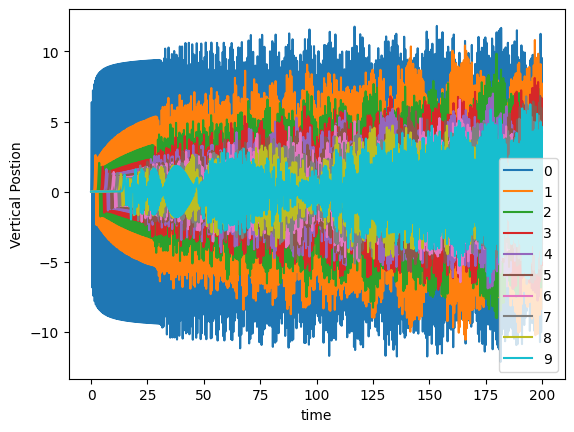

In [103]:
num = (int)(N/10)

plt.figure()

for i in range(num):
  plt.plot(tlist, Y[N-2-10*i], label = '{0}'.format(i))

plt.xlabel('time')
plt.ylabel('Vertical Postion')
plt.legend()

In [104]:
t_step = 1000
tlist = np.linspace(0,20,t_step)

In [105]:
lst = []

for i in range(N-1):
  sub_arr = f_0[i][0]/(omega**2*(-D[i]) - omega_0**2) * np.sin(omega_0 * tlist) - (omega_0/(np.sqrt(-D[i]) * omega)) * f_0[i][0]/(omega**2 * (-D[i])-omega_0**2) * np.sin(np.sqrt(-D[i]) * omega * tlist)
  lst.append(sub_arr)

X = np.array(lst)

In [106]:
lst = []

for i in range(N-1):
  lst.append([])

for i in range(t_step):

  sub_lst = []

  for j in range(N-1):
    sub_lst.append([X[j][i]])

  sub_x = np.array(sub_lst)
  sub_y = np.matmul(P, sub_x)

  for j in range(N-1):
    lst[j].append(sub_y[j][0])

Y = np.array(lst)

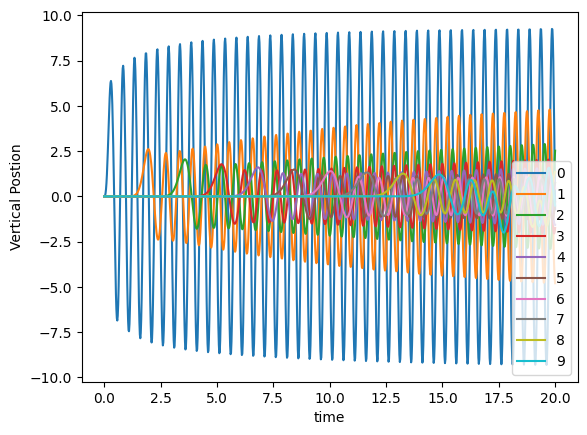

In [107]:
num = (int)(N/10)

plt.figure()

for i in range(num):
  plt.plot(tlist, Y[N-2-10*i], label = '{0}'.format(i))

plt.xlabel('time')
plt.ylabel('Vertical Postion')
plt.legend()

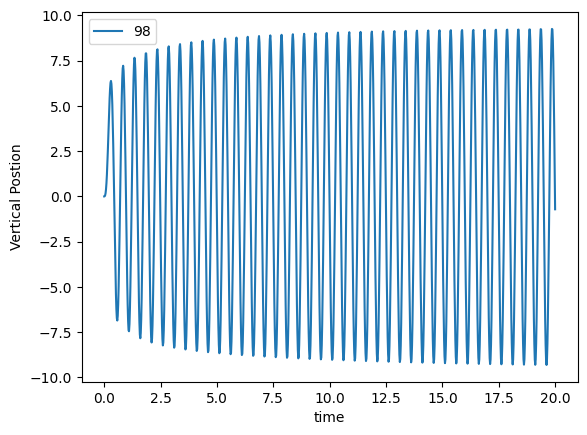

In [108]:
plt.figure()

plt.plot(tlist, Y[N-2], label = '{0}'.format(N-2))

plt.xlabel('time')
plt.ylabel('Vertical Postion')
plt.legend()

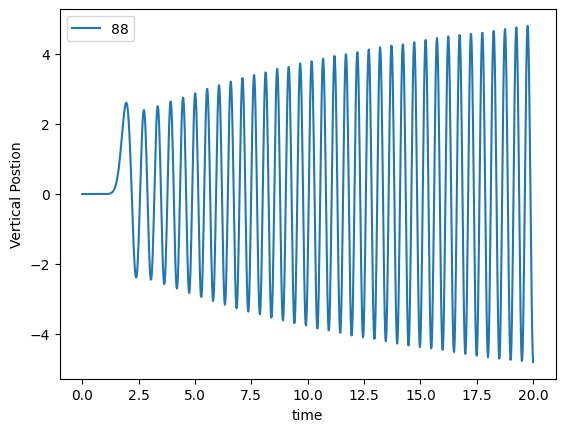

In [109]:
plt.figure()

plt.plot(tlist, Y[N-12], label = '{0}'.format(N-12))

plt.xlabel('time')
plt.ylabel('Vertical Postion')
plt.legend()

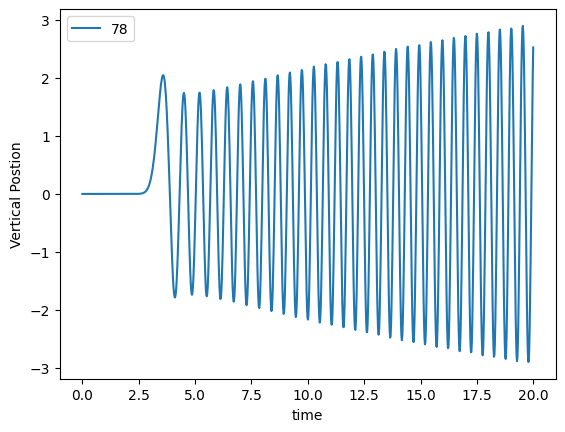

In [110]:
plt.figure()

plt.plot(tlist, Y[N-22], label = '{0}'.format(N-22))

plt.xlabel('time')
plt.ylabel('Vertical Postion')
plt.legend()

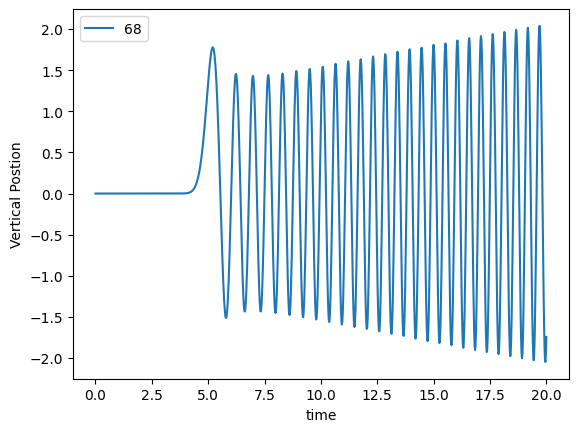

In [111]:
plt.figure()

plt.plot(tlist, Y[N-32], label = '{0}'.format(N-32))

plt.xlabel('time')
plt.ylabel('Vertical Postion')
plt.legend()

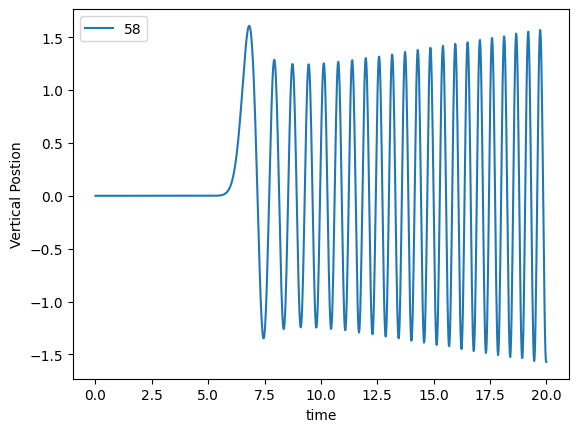

In [112]:
plt.figure()

plt.plot(tlist, Y[N-42], label = '{0}'.format(N-42))

plt.xlabel('time')
plt.ylabel('Vertical Postion')
plt.legend()

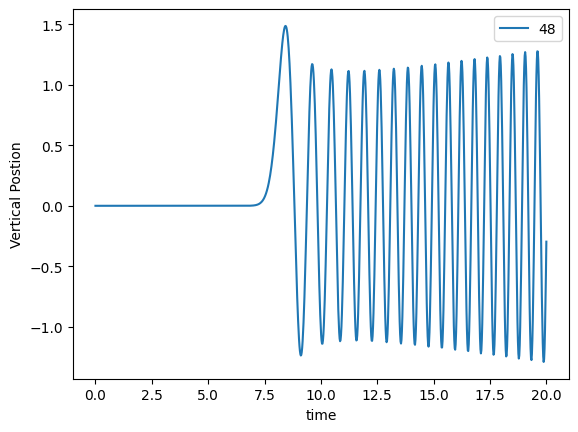

In [113]:
plt.figure()

plt.plot(tlist, Y[N-52], label = '{0}'.format(N-52))

plt.xlabel('time')
plt.ylabel('Vertical Postion')
plt.legend()

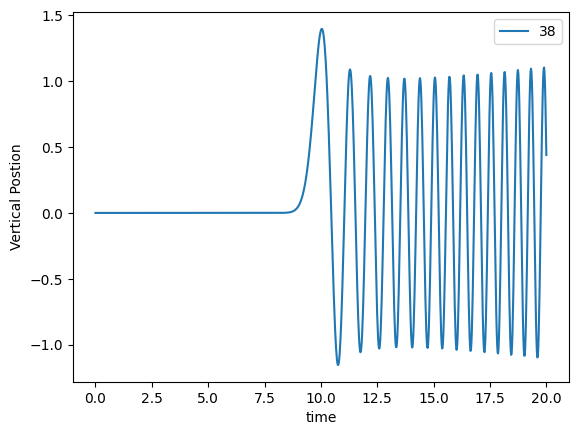

In [114]:
plt.figure()

plt.plot(tlist, Y[N-62], label = '{0}'.format(N-62))

plt.xlabel('time')
plt.ylabel('Vertical Postion')
plt.legend()

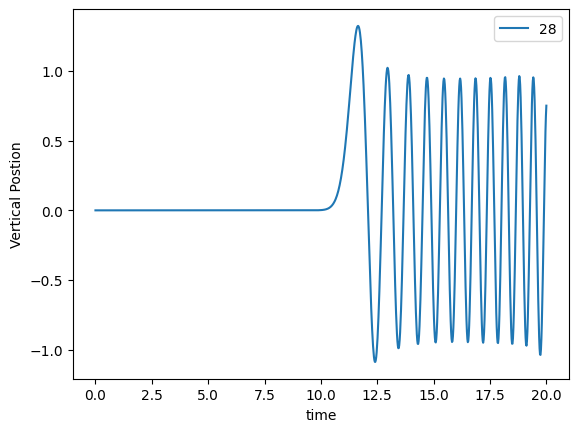

In [115]:
plt.figure()

plt.plot(tlist, Y[N-72], label = '{0}'.format(N-72))

plt.xlabel('time')
plt.ylabel('Vertical Postion')
plt.legend()

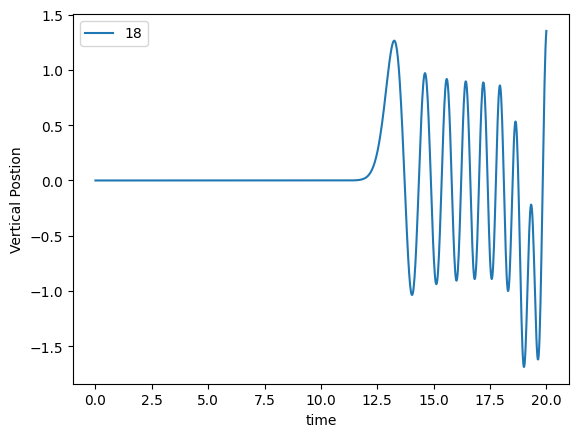

In [116]:
plt.figure()

plt.plot(tlist, Y[N-82], label = '{0}'.format(N-82))

plt.xlabel('time')
plt.ylabel('Vertical Postion')
plt.legend()

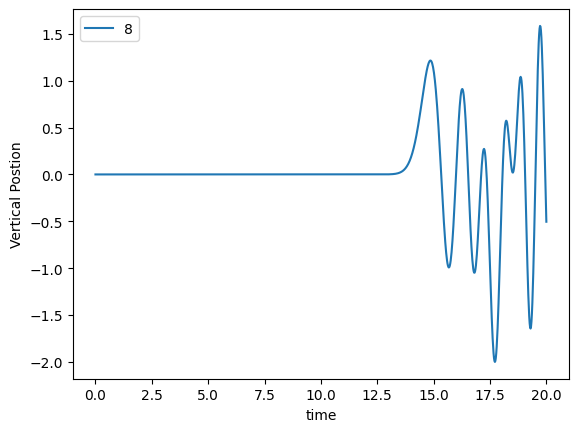

In [117]:
plt.figure()

plt.plot(tlist, Y[N-92], label = '{0}'.format(N-92))

plt.xlabel('time')
plt.ylabel('Vertical Postion')
plt.legend()

### 3) FFT

(0.0, 3.0)

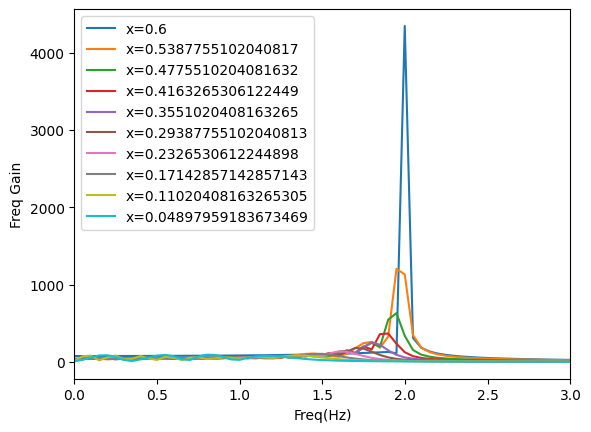

In [118]:
# Frequency Pick becomes more clear(sharper) when position is closer to right point

num = (int)(N/10)

plt.figure()

for i in range(num):
  ylist_fft = np.fft.rfft(Y[N-2-10*i])
  ylist_freq = np.fft.rfftfreq(len(Y[N-2-10*i]), d=tlist[1]-tlist[0])
  plt.plot(ylist_freq, np.abs(ylist_fft), label='x={0}'.format(l*(N-2-10*i)/(N-2)))

plt.xlabel('Freq(Hz)')
plt.ylabel('Freq Gain')
plt.legend()
plt.xlim(0,3)

### 4) Wave Scale

In [119]:
num = (int)(N/10)

delta_lst = []

for i in range(num):

  max = Y[N-2-10*i][0]
  min = Y[N-2-10*i][0]

  for j in range(len(tlist)):
    if (Y[N-2-10*i][j] > max):
      max = Y[N-2-10*i][j]
    if (Y[N-2-10*i][j] < min):
      min = Y[N-2-10*i][j]

  delta_lst.append(max - min)

delta_list = np.array(delta_lst)
xlist = np.array([l*(N-2-10*i)/(N-2) for i in range(num)])

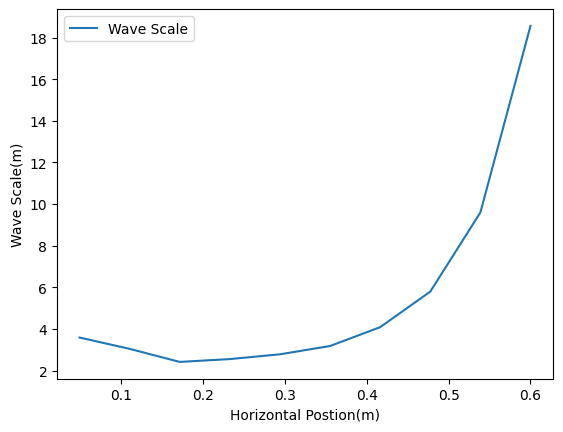

In [120]:
plt.figure()

plt.plot(xlist, delta_list, label = 'Wave Scale')

plt.xlabel('Horizontal Postion(m)')
plt.ylabel('Wave Scale(m)')
plt.legend()

### 5) Wave Velocity

In [121]:
lst = []

for i in range(num):
  t_crit = 0
  ylist = Y[N-2-10*i]

  j = 0
  while (np.abs(ylist[j]) < 0.1):
    t_crit = j
    j = j + 1

  lst.append(t_crit/50)

t_crit_list = np.array(lst)

xst = [l*10*i/(N-2) for i in range(num)]
x_crit_list = np.array(xst)

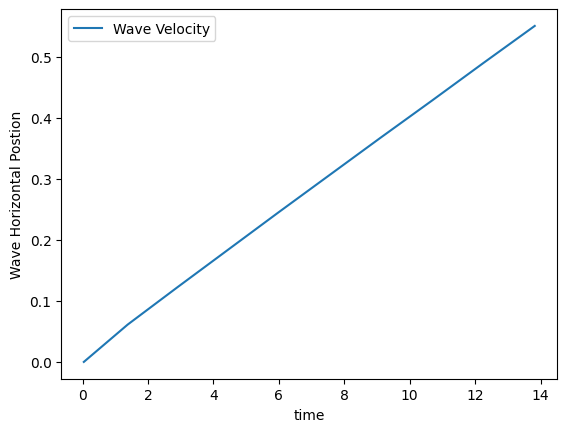

In [122]:
plt.figure()

plt.plot(t_crit_list, x_crit_list, label = 'Wave Velocity')

plt.xlabel('time')
plt.ylabel('Wave Horizontal Postion')
plt.legend()

In [123]:
def func(t, b, a):
    return b + a * t
popt, pcov = curve_fit(func, t_crit_list, x_crit_list, p0 = [0, 0.06])

In [124]:
popt

array([0.00516164, 0.03968711])

Text(0, 0.5, 'Horizontal Position')

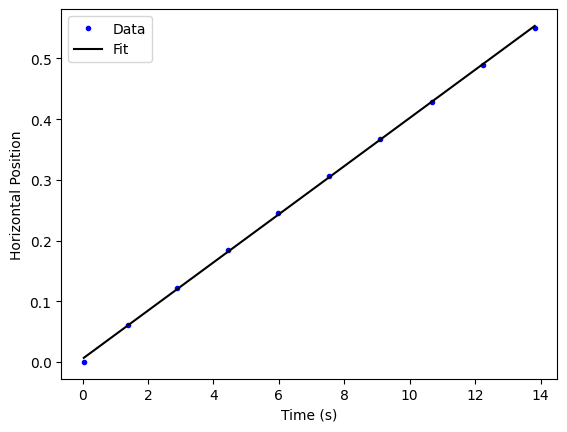

In [125]:
# Wave Velocity is 0.006 m/s

fig, ax = plt.subplots(1, 1)
ax.plot(t_crit_list, x_crit_list, marker='.', lw=0, label = 'Data', color='blue')
ax.plot(t_crit_list, func(t_crit_list, popt[0], popt[1]), label = 'Fit', color='black')
ax.legend()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Horizontal Position')

# 4. Wave Analysis

## 1) Short Metal Transwave (L = 60cm)

### (1) Plot

In [126]:
# Constant

l = 0.6

In [127]:
tlist = np.array([0.0, 0.03333, 0.06667, 0.1, 0.13333, 0.16667, 0.2, 0.23333, 0.26667, 0.3, 0.33333, 0.36667, 0.4, 0.43333, 0.46667, 0.5, 0.53333, 0.56667, 0.6, 0.63333, 0.66667, 0.7, 0.73333, 0.76667, 0.8, 0.83333, 0.86667, 0.9, 0.93333, 0.96667, 1.0, 1.03333, 1.06667, 1.1])
ylist1 = np.array([0.01875, 0.01291, 0.02041, 0.0158, 0.02552, 0.03996, 0.0544, 0.06626, 0.06827, 0.06055, 0.04625, 0.02996, 0.01089, -0.00318, -0.01543, -0.02338, -0.02202, -0.01566, -0.0034, 0.01158, 0.02905, 0.04562, 0.0572, 0.06264, 0.05765, 0.05084, 0.03949, 0.0261, 0.01135, 0.0, -0.01021, -0.0168, -0.01702, -0.01089])
ylist2 = np.array([0.0227, 0.02111, 0.01793, 0.01838, 0.02633, 0.03336, 0.04539, 0.05901, 0.07286, 0.08171, 0.08103, 0.07104, 0.05629, 0.03949, 0.02111, 0.00409, -0.00862, -0.0143, -0.01271, -0.00159, 0.01089, 0.02633, 0.04335, 0.05901, 0.07059, 0.06968, 0.05651, 0.04358, 0.032, 0.01997, 0.0118, 0.00431, 0.00545, 0.01044])
ylist3 = np.array([0.04698, 0.04744, 0.04903, 0.04812, 0.04812, 0.05016, 0.05175, 0.05379, 0.06015, 0.06741, 0.08148, 0.09192, 0.09782, 0.09101, 0.07944, 0.06264, 0.0438, 0.0261, 0.01316, 0.00477, 0.00613, 0.01226, 0.02088, 0.03087, 0.04131, 0.05198, 0.0606, 0.06559, 0.06605, 0.06287, 0.06128, 0.05765, 0.05447, 0.05152])
ylist4 = np.array([0.04857, 0.04993, 0.05493, 0.0572, 0.0581, 0.05651, 0.05266, 0.04993, 0.05129, 0.05334, 0.0581, 0.06219, 0.07172, 0.08262, 0.0892, 0.08284, 0.07263, 0.06242, 0.05061, 0.03087, 0.01453, 0.00045, -0.00182, -0.00182, 0.00704, 0.02156, 0.03745, 0.05447, 0.07127, 0.08489, 0.09124, 0.08829, 0.08171, 0.06809])
ylist5 = np.array([0.0581, 0.0572, 0.06083, 0.06105, 0.06174, 0.06174, 0.05788, 0.05765, 0.05924, 0.06128, 0.06105, 0.05992, 0.06128, 0.06446, 0.06854, 0.07422, 0.08103, 0.07808, 0.06673, 0.05583, 0.04244, 0.02837, 0.02156, 0.02292, 0.02792, 0.03586, 0.04517, 0.05425, 0.06264, 0.06923, 0.07762, 0.07989, 0.07422, 0.06423])

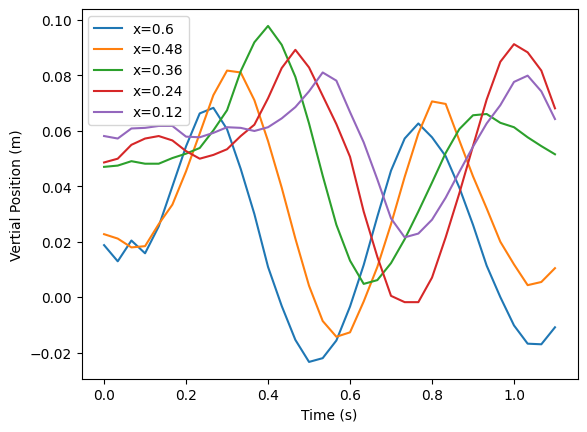

In [128]:
plt.figure()

plt.plot(tlist, ylist1, label='x={0}'.format(l*5/5))
plt.plot(tlist, ylist2, label='x={0}'.format(l*4/5))
plt.plot(tlist, ylist3, label='x={0}'.format(l*3/5))
plt.plot(tlist, ylist4, label='x={0}'.format(l*2/5))
plt.plot(tlist, ylist5, label='x={0}'.format(l*1/5))

plt.xlabel('Time (s)')
plt.ylabel('Vertial Position (m)')
plt.legend()

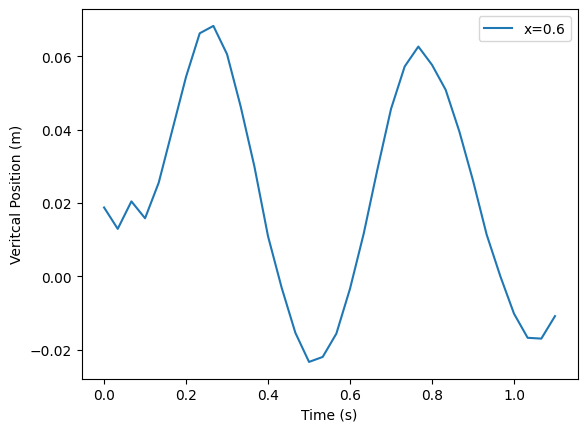

In [129]:
plt.figure()

plt.plot(tlist, ylist1, label='x={0}'.format(l*5/5))

plt.xlabel('Time (s)')
plt.ylabel('Veritcal Position (m)')
plt.legend()

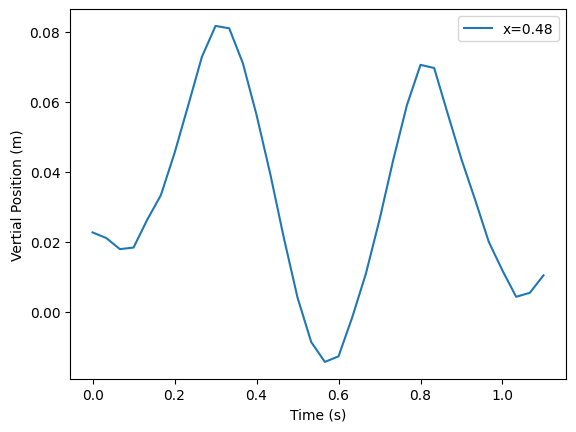

In [130]:
plt.figure()

plt.plot(tlist, ylist2, label='x={0}'.format(l*4/5))

plt.xlabel('Time (s)')
plt.ylabel('Vertial Position (m)')
plt.legend()

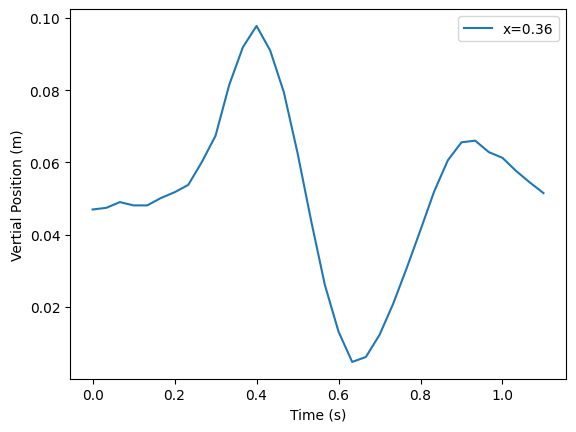

In [131]:
plt.figure()

plt.plot(tlist, ylist3, label='x={0}'.format(l*3/5))

plt.xlabel('Time (s)')
plt.ylabel('Vertial Position (m)')
plt.legend()

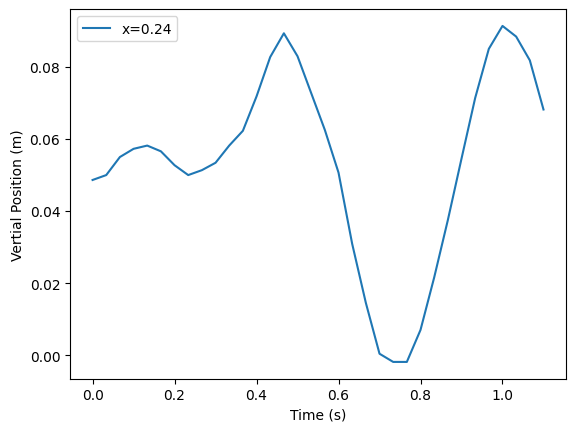

In [132]:
plt.figure()

plt.plot(tlist, ylist4, label='x={0}'.format(l*2/5))

plt.xlabel('Time (s)')
plt.ylabel('Vertial Position (m)')
plt.legend()

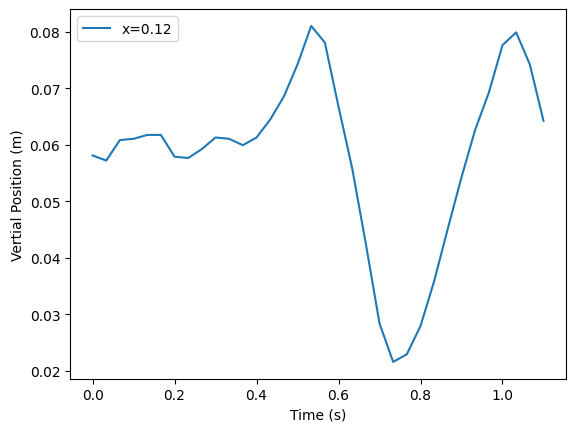

In [133]:
plt.figure()

plt.plot(tlist, ylist5, label='x={0}'.format(l*1/5))

plt.xlabel('Time (s)')
plt.ylabel('Vertial Position (m)')
plt.legend()

### (2) FFT

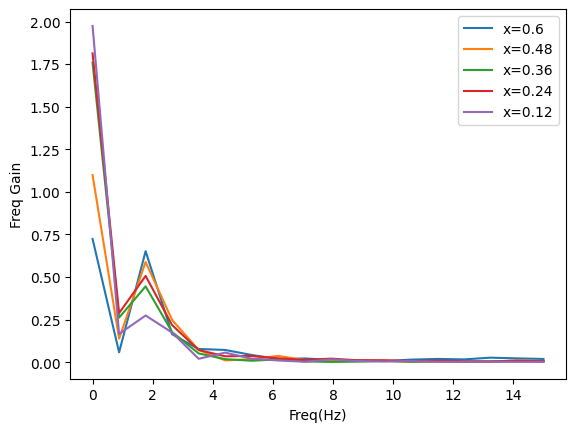

In [134]:
# Forced Oscillation by 1.765 Hz

ylist1_fft = np.fft.rfft(ylist1)
ylist1_freq = np.fft.rfftfreq(len(ylist1), d=tlist[1]-tlist[0])

ylist2_fft = np.fft.rfft(ylist2)
ylist2_freq = np.fft.rfftfreq(len(ylist2), d=tlist[1]-tlist[0])

ylist3_fft = np.fft.rfft(ylist3)
ylist3_freq = np.fft.rfftfreq(len(ylist3), d=tlist[1]-tlist[0])

ylist4_fft = np.fft.rfft(ylist4)
ylist4_freq = np.fft.rfftfreq(len(ylist4), d=tlist[1]-tlist[0])

ylist5_fft = np.fft.rfft(ylist5)
ylist5_freq = np.fft.rfftfreq(len(ylist5), d=tlist[1]-tlist[0])

plt.figure()

plt.plot(ylist1_freq, np.abs(ylist1_fft), label='x={0}'.format(l*5/5))
plt.plot(ylist2_freq, np.abs(ylist2_fft), label='x={0}'.format(l*4/5))
plt.plot(ylist3_freq, np.abs(ylist3_fft), label='x={0}'.format(l*3/5))
plt.plot(ylist4_freq, np.abs(ylist4_fft), label='x={0}'.format(l*2/5))
plt.plot(ylist5_freq, np.abs(ylist5_fft), label='x={0}'.format(l*1/5))

plt.xlabel('Freq(Hz)')
plt.ylabel('Freq Gain')
plt.legend()

### (3) Wave Scale

In [135]:
delta_lst = []


max = ylist1[0]
min = ylist1[0]

for j in range(len(tlist)):
  if (ylist1[j] > max):
    max = ylist1[j]
  if (ylist1[j] < min):
    min = ylist1[j]

delta_lst.append(max - min)


max = ylist2[0]
min = ylist2[0]

for j in range(len(tlist)):
  if (ylist2[j] > max):
    max = ylist2[j]
  if (ylist2[j] < min):
    min = ylist2[j]

delta_lst.append(max - min)


max = ylist3[0]
min = ylist3[0]

for j in range(len(tlist)):
  if (ylist3[j] > max):
    max = ylist3[j]
  if (ylist3[j] < min):
    min = ylist3[j]

delta_lst.append(max - min)


max = ylist4[0]
min = ylist4[0]

for j in range(len(tlist)):
  if (ylist4[j] > max):
    max = ylist4[j]
  if (ylist4[j] < min):
    min = ylist4[j]

delta_lst.append(max - min)


max = ylist5[0]
min = ylist5[0]

for j in range(len(tlist)):
  if (ylist5[j] > max):
    max = ylist5[j]
  if (ylist5[j] < min):
    min = ylist5[j]

delta_lst.append(max - min)


delta_list = np.array(delta_lst)
xlist = np.array([l*(5-i)/5 for i in range(5)])

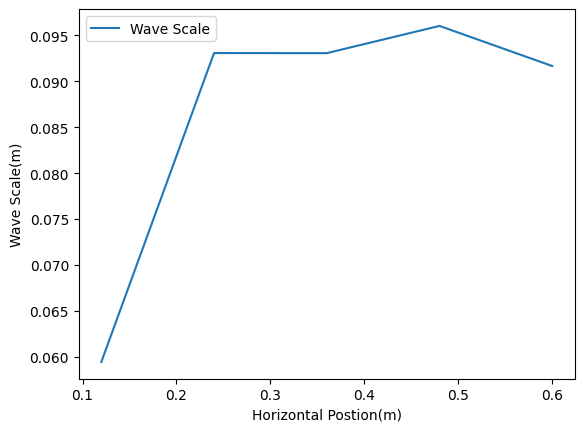

In [136]:
plt.figure()

plt.plot(xlist, delta_list, label = 'Wave Scale')

plt.xlabel('Horizontal Postion(m)')
plt.ylabel('Wave Scale(m)')
plt.legend()

### (4) Wave Velocity

In [137]:
t_crit_list = np.array([0.43333, 0.33333, 0.23333, 0.13333, 0.1])

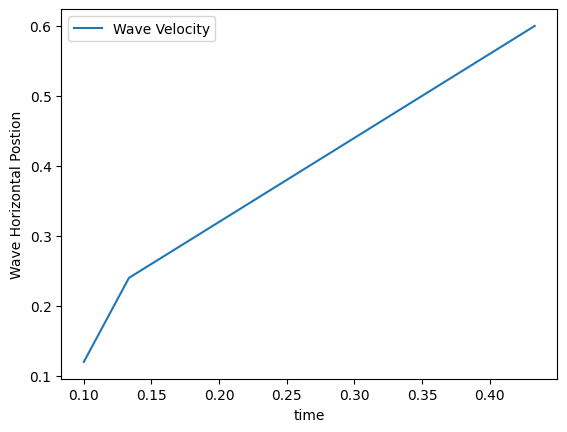

In [138]:
plt.figure()

plt.plot(t_crit_list, xlist, label = 'Wave Velocity')

plt.xlabel('time')
plt.ylabel('Wave Horizontal Postion')
plt.legend()

In [139]:
def func(t, b, a):
    return b + a * t
popt, pcov = curve_fit(func, t_crit_list, xlist, p0 = [0, 0.1])

In [140]:
popt

array([0.02636031, 1.35260795])

Text(0, 0.5, 'Horizontal Position')

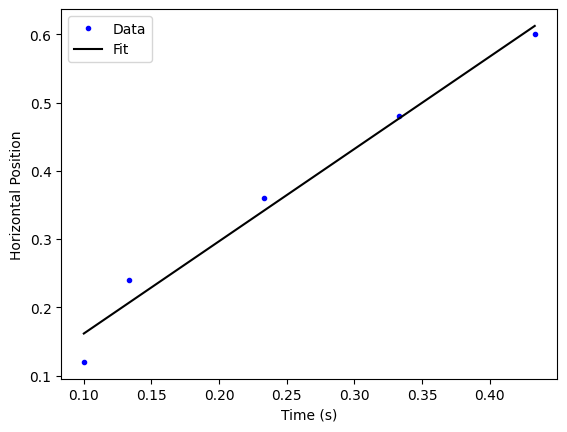

In [141]:
# Wave Velocity is 0.006 m/s

fig, ax = plt.subplots(1, 1)
ax.plot(t_crit_list, xlist, marker='.', lw=0, label = 'Data', color='blue')
ax.plot(t_crit_list, func(t_crit_list, popt[0], popt[1]), label = 'Fit', color='black')
ax.legend()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Horizontal Position')

## 2) Short Plastic Transwave (L = 60cm)

### (1) Plot

In [142]:
# Constant

l = 0.6

In [143]:
tlist = np.array([0.0, 0.03333, 0.06667, 0.1, 0.13333, 0.16667, 0.2, 0.23333, 0.26667, 0.3, 0.33333, 0.36667, 0.4, 0.43333, 0.46667, 0.5, 0.53333, 0.56667, 0.6, 0.63333, 0.66667, 0.7, 0.73333, 0.76667, 0.8, 0.83333, 0.86667, 0.9, 0.93333, 0.96667, 1.0, 1.03333, 1.06667, 1.1, 1.13333, 1.16667, 1.2, 1.23333, 1.26667, 1.3, 1.33333, 1.36667, 1.4, 1.43333, 1.46667, 1.5, 1.53333, 1.56667, 1.6, 1.63333, 1.66667, 1.7, 1.73333, 1.76667, 1.8, 1.83333, 1.86667, 1.9, 1.93333, 1.96667])
ylist1 = np.array([0.02791, 0.03146, 0.03777, 0.04544, 0.05141, 0.0587, 0.06069, 0.05804, 0.05041, 0.04112, 0.02952, 0.02123, 0.01559, 0.01393, 0.01625, 0.02388, 0.03316, 0.0388, 0.04743, 0.05306, 0.05704, 0.05638, 0.05107, 0.04112, 0.03117, 0.01924, 0.01094, 0.0, -0.00531, 0.00033, 0.00962, 0.01725, 0.02587, 0.03549, 0.04378, 0.05505, 0.05804, 0.05074, 0.04212, 0.03283, 0.02089, 0.00531, -0.00531, -0.0073, -0.00763, 0.0, 0.00763, 0.02056, 0.03316, 0.04743, 0.05936, 0.07097, 0.07827, 0.07197, 0.06202, 0.04942, 0.03449, 0.02189, 0.00597, 0.0072])
ylist2 = np.array([0.02686, 0.02753, 0.02653, 0.02985, 0.04013, 0.04743, 0.05539, 0.065, 0.06732, 0.06334, 0.05472, 0.0451, 0.03217, 0.02587, 0.02023, 0.02023, 0.02322, 0.02918, 0.03383, 0.04079, 0.04544, 0.04875, 0.04776, 0.04477, 0.03814, 0.02918, 0.01924, 0.01426, 0.00962, 0.01028, 0.01061, 0.01791, 0.02554, 0.03051, 0.03515, 0.03913, 0.0388, 0.03947, 0.03748, 0.03117, 0.02322, 0.01526, 0.0073, 0.00232, 0.00099, 0.00133, 0.00497, 0.00895, 0.01857, 0.02819, 0.0388, 0.05174, 0.05903, 0.06202, 0.06036, 0.05439, 0.0461, 0.03515, 0.02487, 0.01791])
ylist3 = np.array([0.01161, 0.00929, 0.00829, 0.00431, 0.0063, 0.01227, 0.01957, 0.02753, 0.03582, 0.04544, 0.04908, 0.05041, 0.04676, 0.04146, 0.03084, 0.01426, 0.00829, -0.00232, -0.00531, -0.00696, -0.00597, -0.00199, 0.00365, 0.0073, 0.00995, 0.01791, 0.02521, 0.02852, 0.02587, 0.02189, 0.01791, 0.0126, 0.0063, 0.00066, -0.00298, -0.00531, -0.00696, -0.0073, -0.00166, 0.00862, 0.01824, 0.02189, 0.02388, 0.02023, 0.01592, 0.00995, 0.00232, -0.0073, -0.01393, -0.01559, -0.01559, -0.01327, -0.00597, 0.00199, 0.0136, 0.02554, 0.03449, 0.0451, 0.0451, 0.04411])
ylist4 = np.array([0.00564, 0.00431, 0.00265, 0.00166, -0.00265, -0.00133, 0.00332, 0.00763, 0.01459, 0.02521, 0.03283, 0.0398, 0.04709, 0.04676, 0.04212, 0.03051, 0.01625, -0.00398, -0.01957, -0.03117, -0.03947, -0.0398, -0.03482, -0.02156, -0.00365, 0.01028, 0.02355, 0.03615, 0.04245, 0.04079, 0.03383, 0.02156, 0.00564, -0.00962, -0.02355, -0.03549, -0.03947, -0.03416, -0.02189, -0.00763, 0.00497, 0.02123, 0.03051, 0.03748, 0.03847, 0.03051, 0.0199, 0.00531, -0.01559, -0.02952, -0.04179, -0.05141, -0.04776, -0.0398, -0.02355, -0.00199, 0.02089, 0.03748, 0.05605, 0.06434])
ylist5 = np.array([-0.00829, -0.0075, -0.00619, -0.0075, -0.00856, -0.01013, -0.01013, -0.00803, -0.0025, 0.00276, 0.00645, 0.00961, 0.01435, 0.01566, 0.01566, 0.01119, 0.00434, -0.00382, -0.01803, -0.02856, -0.03514, -0.03777, -0.0304, -0.01908, -0.01224, -0.00645, 0.00276, 0.00987, 0.01461, 0.01224, 0.01066, 0.00829, -0.00118, -0.01724, -0.02724, -0.03225, -0.03067, -0.02777, -0.02198, -0.01487, -0.00803, -0.00118, 0.00487, 0.0104, 0.01382, 0.0125, 0.00698, -0.00145, -0.01487, -0.02409, -0.03383, -0.03698, -0.03935, -0.03646, -0.02619, -0.01566, -0.00592, 0.00461, 0.01435, 0.02382])

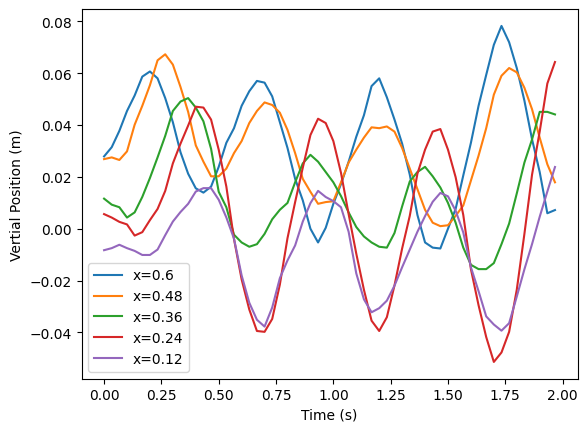

In [144]:
plt.figure()

plt.plot(tlist, ylist1, label='x={0}'.format(l*5/5))
plt.plot(tlist, ylist2, label='x={0}'.format(l*4/5))
plt.plot(tlist, ylist3, label='x={0}'.format(l*3/5))
plt.plot(tlist, ylist4, label='x={0}'.format(l*2/5))
plt.plot(tlist, ylist5, label='x={0}'.format(l*1/5))

plt.xlabel('Time (s)')
plt.ylabel('Vertial Position (m)')
plt.legend()

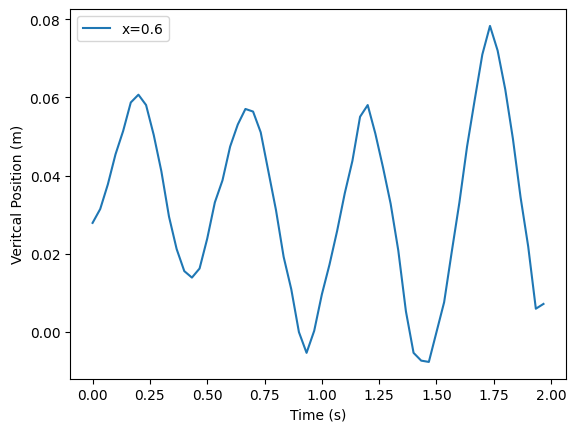

In [145]:
plt.figure()

plt.plot(tlist, ylist1, label='x={0}'.format(l*5/5))

plt.xlabel('Time (s)')
plt.ylabel('Veritcal Position (m)')
plt.legend()

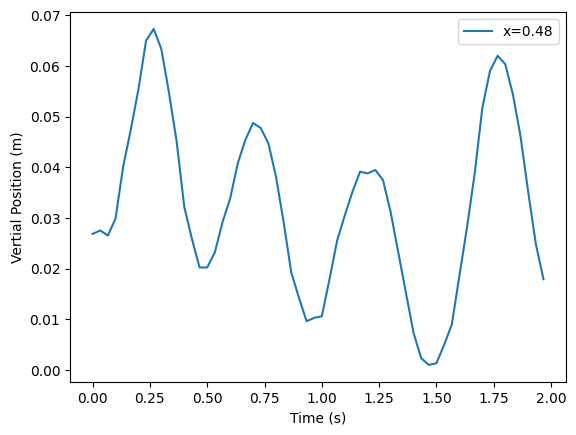

In [146]:
plt.figure()

plt.plot(tlist, ylist2, label='x={0}'.format(l*4/5))

plt.xlabel('Time (s)')
plt.ylabel('Vertial Position (m)')
plt.legend()

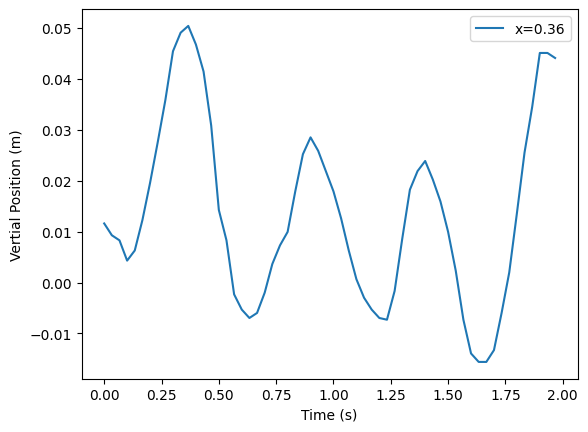

In [147]:
plt.figure()

plt.plot(tlist, ylist3, label='x={0}'.format(l*3/5))

plt.xlabel('Time (s)')
plt.ylabel('Vertial Position (m)')
plt.legend()

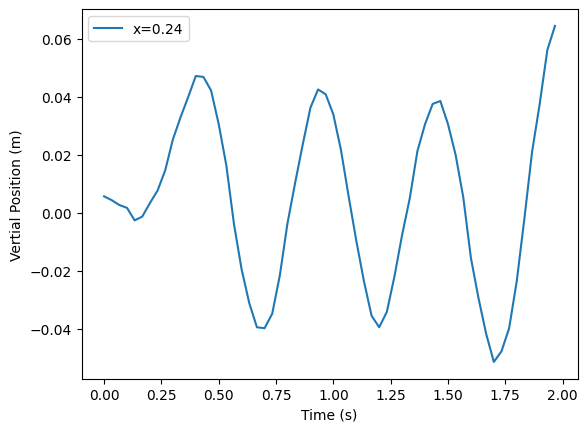

In [148]:
plt.figure()

plt.plot(tlist, ylist4, label='x={0}'.format(l*2/5))

plt.xlabel('Time (s)')
plt.ylabel('Vertial Position (m)')
plt.legend()

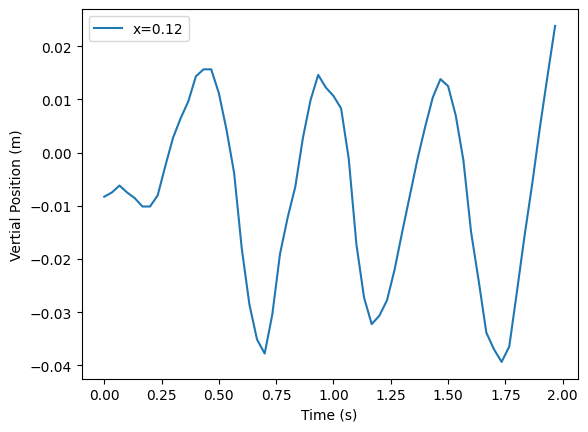

In [149]:
plt.figure()

plt.plot(tlist, ylist5, label='x={0}'.format(l*1/5))

plt.xlabel('Time (s)')
plt.ylabel('Vertial Position (m)')
plt.legend()

### (2) FFT

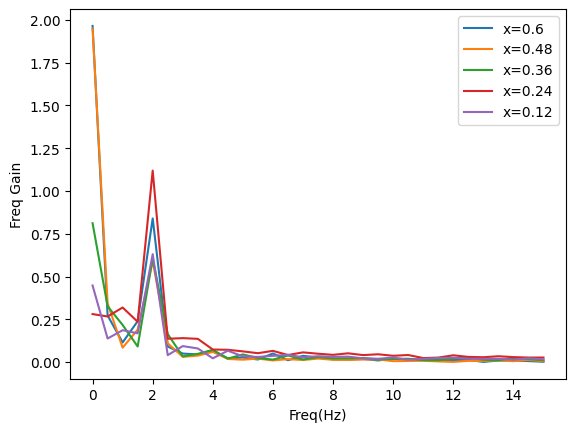

In [150]:
# Forced Oscillation by 1.765 Hz

ylist1_fft = np.fft.rfft(ylist1)
ylist1_freq = np.fft.rfftfreq(len(ylist1), d=tlist[1]-tlist[0])

ylist2_fft = np.fft.rfft(ylist2)
ylist2_freq = np.fft.rfftfreq(len(ylist2), d=tlist[1]-tlist[0])

ylist3_fft = np.fft.rfft(ylist3)
ylist3_freq = np.fft.rfftfreq(len(ylist3), d=tlist[1]-tlist[0])

ylist4_fft = np.fft.rfft(ylist4)
ylist4_freq = np.fft.rfftfreq(len(ylist4), d=tlist[1]-tlist[0])

ylist5_fft = np.fft.rfft(ylist5)
ylist5_freq = np.fft.rfftfreq(len(ylist5), d=tlist[1]-tlist[0])

plt.figure()

plt.plot(ylist1_freq, np.abs(ylist1_fft), label='x={0}'.format(l*5/5))
plt.plot(ylist2_freq, np.abs(ylist2_fft), label='x={0}'.format(l*4/5))
plt.plot(ylist3_freq, np.abs(ylist3_fft), label='x={0}'.format(l*3/5))
plt.plot(ylist4_freq, np.abs(ylist4_fft), label='x={0}'.format(l*2/5))
plt.plot(ylist5_freq, np.abs(ylist5_fft), label='x={0}'.format(l*1/5))

plt.xlabel('Freq(Hz)')
plt.ylabel('Freq Gain')
plt.legend()

### (3) Wave Scale

In [151]:
delta_lst = []


max = ylist1[0]
min = ylist1[0]

for j in range(len(tlist)):
  if (ylist1[j] > max):
    max = ylist1[j]
  if (ylist1[j] < min):
    min = ylist1[j]

delta_lst.append(max - min)


max = ylist2[0]
min = ylist2[0]

for j in range(len(tlist)):
  if (ylist2[j] > max):
    max = ylist2[j]
  if (ylist2[j] < min):
    min = ylist2[j]

delta_lst.append(max - min)


max = ylist3[0]
min = ylist3[0]

for j in range(len(tlist)):
  if (ylist3[j] > max):
    max = ylist3[j]
  if (ylist3[j] < min):
    min = ylist3[j]

delta_lst.append(max - min)


max = ylist4[0]
min = ylist4[0]

for j in range(len(tlist)):
  if (ylist4[j] > max):
    max = ylist4[j]
  if (ylist4[j] < min):
    min = ylist4[j]

delta_lst.append(max - min)


max = ylist5[0]
min = ylist5[0]

for j in range(len(tlist)):
  if (ylist5[j] > max):
    max = ylist5[j]
  if (ylist5[j] < min):
    min = ylist5[j]

delta_lst.append(max - min)


delta_list = np.array(delta_lst)
xlist = np.array([l*(5-i)/5 for i in range(5)])

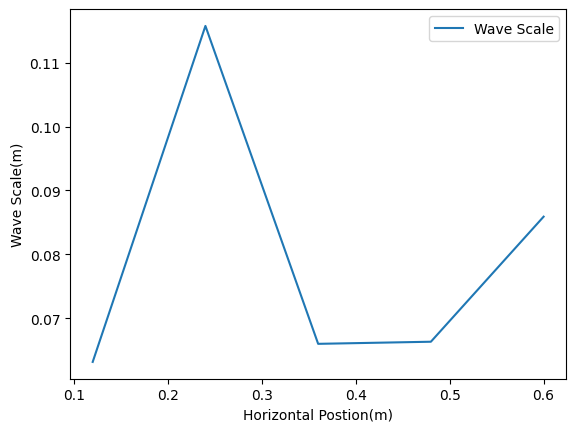

In [152]:
plt.figure()

plt.plot(xlist, delta_list, label = 'Wave Scale')

plt.xlabel('Horizontal Postion(m)')
plt.ylabel('Wave Scale(m)')
plt.legend()

### (4) Wave Velocity

In [153]:
t_crit_list = np.array([0.23333, 0.16667, 0.13333, 0.06667, 0])

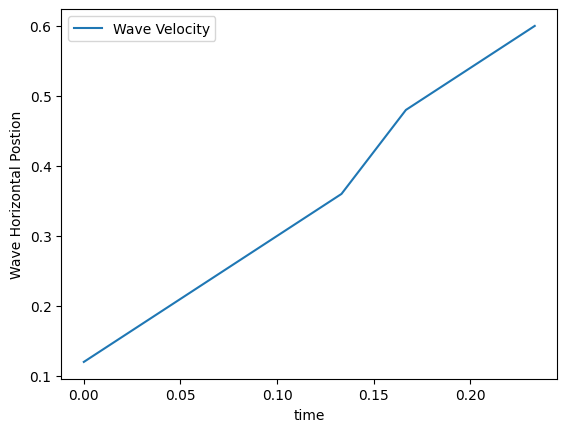

In [154]:
plt.figure()

plt.plot(t_crit_list, xlist, label = 'Wave Velocity')

plt.xlabel('time')
plt.ylabel('Wave Horizontal Postion')
plt.legend()

In [155]:
def func(t, b, a):
    return b + a * t
popt, pcov = curve_fit(func, t_crit_list, xlist, p0 = [0, 0.1])

In [156]:
popt

array([0.10848922, 2.09592317])

Text(0, 0.5, 'Horizontal Position')

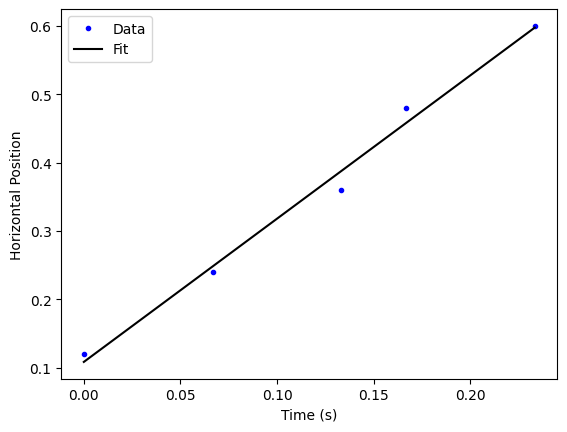

In [157]:
# Wave Velocity is 0.006 m/s

fig, ax = plt.subplots(1, 1)
ax.plot(t_crit_list, xlist, marker='.', lw=0, label = 'Data', color='blue')
ax.plot(t_crit_list, func(t_crit_list, popt[0], popt[1]), label = 'Fit', color='black')
ax.legend()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Horizontal Position')

## 3) Short Plastic Transwave (L = 30cm)

### (1) Plot

In [158]:
# Constant

l = 0.3

In [159]:
tlist = np.array([0.0, 0.03333, 0.06667, 0.1, 0.13333, 0.16667, 0.2, 0.23333, 0.26667, 0.3, 0.33333, 0.36667, 0.4, 0.43333, 0.46667, 0.5, 0.53333, 0.56667, 0.6, 0.63333, 0.66667, 0.7, 0.73333, 0.76667, 0.8, 0.83333, 0.86667, 0.9, 0.93333, 0.96667, 1.0, 1.03333, 1.06667, 1.1, 1.13333, 1.16667, 1.2, 1.23333, 1.26667, 1.3, 1.33333, 1.36667, 1.4, 1.43333, 1.46667, 1.5, 1.53333, 1.56667, 1.6, 1.63333, 1.66667, 1.7, 1.73333, 1.76667, 1.8, 1.83333, 1.86667, 1.9, 1.93333, 1.96667, 2.0])
ylist1 = np.array([-0.00361, -0.01145, -0.02169, -0.04036, -0.05121, -0.06145, -0.05844, -0.04699, -0.03313, -0.01868, -0.00723, 0.00422, 0.00602, -0.00542, -0.02289, -0.04458, -0.05723, -0.06446, -0.06145, -0.05422, -0.04578, -0.02289, -0.00783, 0.00783, 0.01205, 0.00663, -0.00542, -0.02048, -0.03675, -0.05241, -0.05844, -0.05844, -0.05362, -0.04217, -0.02711, -0.01145, 0.00964, 0.01928, 0.02169, 0.01566, 0.00301, -0.01145, -0.03374, -0.05, -0.06386, -0.06627, -0.06145, -0.05241, -0.03916, -0.02169, -0.00181, 0.00964, 0.01506, 0.01325, 0.0012, -0.01627, -0.03434, -0.0506, -0.05964, -0.05301, -0.04096])
ylist2 = np.array([-0.00301, 0.0012, -0.00301, -0.01145, -0.0259, -0.04337, -0.06265, -0.06386, -0.05301, -0.04096, -0.02771, -0.01627, -0.00663, -0.01024, -0.02048, -0.03675, -0.05422, -0.06687, -0.06747, -0.05542, -0.03795, -0.0247, -0.01325, -0.00361, 0.00181, 0.0012, -0.00964, -0.02289, -0.03976, -0.05301, -0.05603, -0.05301, -0.04639, -0.03856, -0.02771, -0.01928, -0.01265, -0.0006, 0.00904, 0.01024, 0.00482, -0.00602, -0.01506, -0.02892, -0.04157, -0.05241, -0.05783, -0.05663, -0.0494, -0.03615, -0.02831, -0.01325, -0.00482, -0.00482, -0.00904, -0.01868, -0.02711, -0.03916, -0.04458, -0.04096, -0.03313])
ylist3 = np.array([-0.03133, -0.0247, -0.01506, -0.00904, -0.01747, -0.02892, -0.04578, -0.06807, -0.08133, -0.08795, -0.08434, -0.07892, -0.06988, -0.06084, -0.05121, -0.04578, -0.04157, -0.04096, -0.04217, -0.04518, -0.04699, -0.04458, -0.04759, -0.05, -0.05241, -0.05542, -0.05542, -0.05422, -0.05121, -0.04639, -0.04458, -0.04639, -0.04639, -0.0506, -0.05422, -0.05663, -0.06145, -0.06084, -0.05603, -0.04639, -0.03253, -0.02169, -0.01325, -0.01566, -0.02651, -0.03374, -0.04639, -0.05783, -0.07109, -0.07771, -0.08313, -0.08313, -0.07952, -0.07289, -0.05904, -0.05121, -0.03494, -0.02651, -0.02229, -0.02831, -0.03253])
ylist4 = np.array([-0.0506, -0.04759, -0.03976, -0.03133, -0.02651, -0.02892, -0.03494, -0.0488, -0.06807, -0.09579, -0.11326, -0.1241, -0.11627, -0.10844, -0.08795, -0.05482, -0.03313, -0.01807, -0.01386, -0.01988, -0.03856, -0.05542, -0.08615, -0.09759, -0.10482, -0.10362, -0.09338, -0.07289, -0.05603, -0.04157, -0.03374, -0.03012, -0.03856, -0.05482, -0.06627, -0.08133, -0.08615, -0.08795, -0.08615, -0.08193, -0.06868, -0.05241, -0.03133, -0.01988, -0.01627, -0.01747, -0.02771, -0.05181, -0.07771, -0.0982, -0.11205, -0.1247, -0.1253, -0.11326, -0.10844, -0.07109, -0.04578, -0.0259, -0.00904, -0.00783, -0.01084])
ylist5 = np.array([-0.07289, -0.06928, -0.06506, -0.06145, -0.05904, -0.05844, -0.06024, -0.06325, -0.07048, -0.08554, -0.0982, -0.10904, -0.10964, -0.0994, -0.08554, -0.06988, -0.05783, -0.0506, -0.04699, -0.0488, -0.05783, -0.0741, -0.08795, -0.09759, -0.0988, -0.09579, -0.08916, -0.07892, -0.06868, -0.06024, -0.05783, -0.05844, -0.06446, -0.07109, -0.07892, -0.08856, -0.08916, -0.09217, -0.08374, -0.08072, -0.07651, -0.07169, -0.06807, -0.05723, -0.0506, -0.0488, -0.05362, -0.06566, -0.07711, -0.09157, -0.10422, -0.10723, -0.10542, -0.0988, -0.09036, -0.08133, -0.06928, -0.05663, -0.04819, -0.04337, -0.04337])

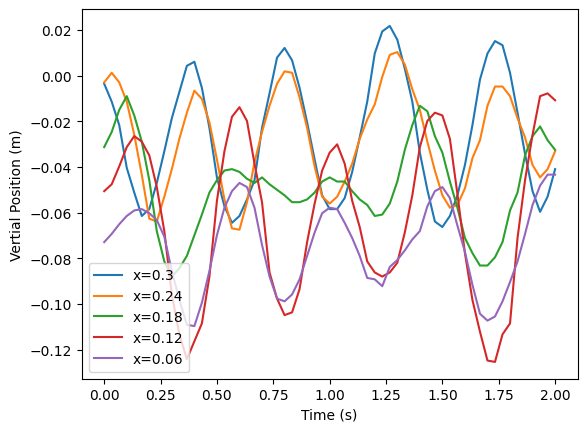

In [160]:
plt.figure()

plt.plot(tlist, ylist1, label='x={0}'.format(l*5/5))
plt.plot(tlist, ylist2, label='x={0}'.format(l*4/5))
plt.plot(tlist, ylist3, label='x={0}'.format(l*3/5))
plt.plot(tlist, ylist4, label='x={0}'.format(l*2/5))
plt.plot(tlist, ylist5, label='x={0}'.format(l*1/5))

plt.xlabel('Time (s)')
plt.ylabel('Vertial Position (m)')
plt.legend()

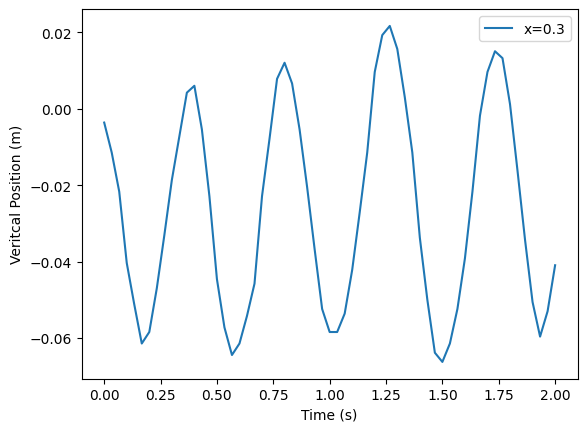

In [161]:
plt.figure()

plt.plot(tlist, ylist1, label='x={0}'.format(l*5/5))

plt.xlabel('Time (s)')
plt.ylabel('Veritcal Position (m)')
plt.legend()

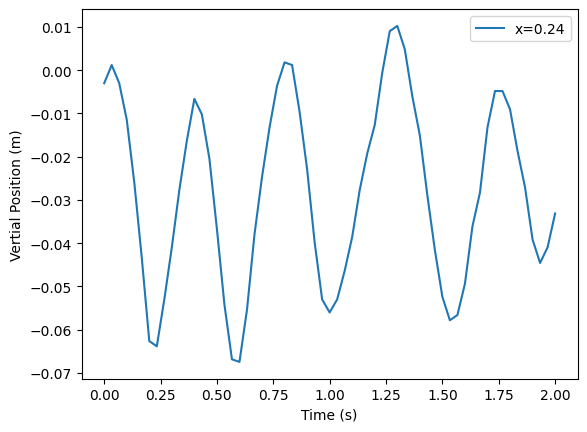

In [162]:
plt.figure()

plt.plot(tlist, ylist2, label='x={0}'.format(l*4/5))

plt.xlabel('Time (s)')
plt.ylabel('Vertial Position (m)')
plt.legend()

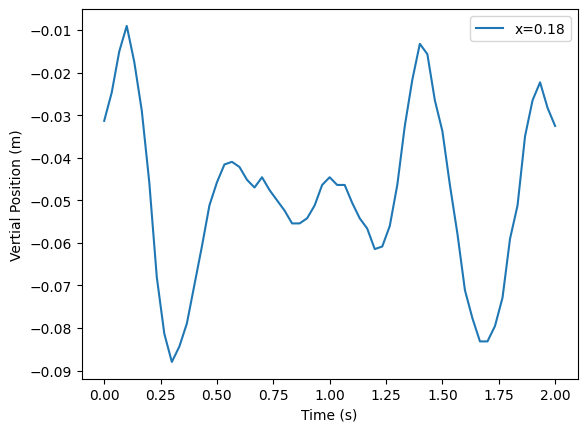

In [163]:
plt.figure()

plt.plot(tlist, ylist3, label='x={0}'.format(l*3/5))

plt.xlabel('Time (s)')
plt.ylabel('Vertial Position (m)')
plt.legend()

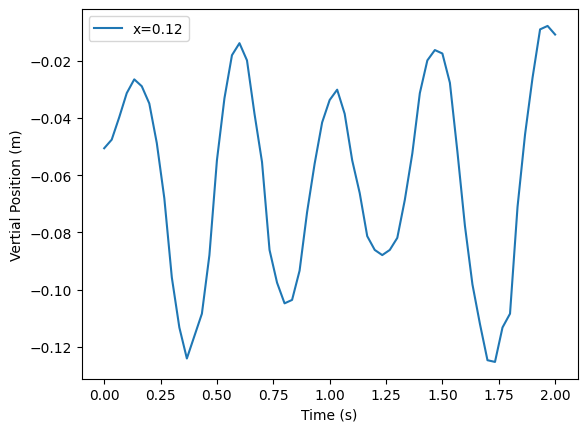

In [164]:
plt.figure()

plt.plot(tlist, ylist4, label='x={0}'.format(l*2/5))

plt.xlabel('Time (s)')
plt.ylabel('Vertial Position (m)')
plt.legend()

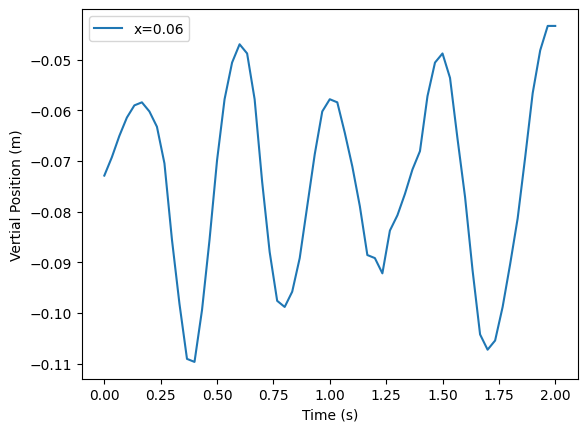

In [165]:
plt.figure()

plt.plot(tlist, ylist5, label='x={0}'.format(l*1/5))

plt.xlabel('Time (s)')
plt.ylabel('Vertial Position (m)')
plt.legend()

### (2) FFT

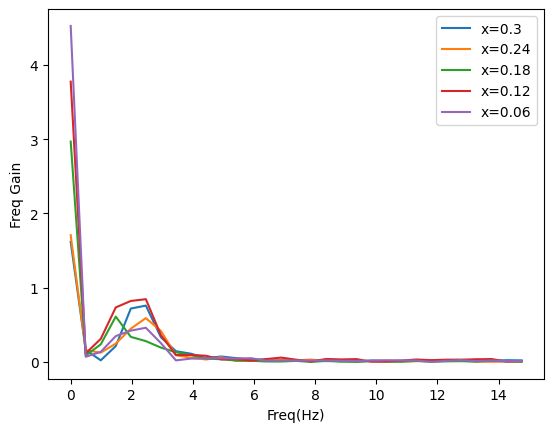

In [166]:
# Forced Oscillation by 1.765 Hz

ylist1_fft = np.fft.rfft(ylist1)
ylist1_freq = np.fft.rfftfreq(len(ylist1), d=tlist[1]-tlist[0])

ylist2_fft = np.fft.rfft(ylist2)
ylist2_freq = np.fft.rfftfreq(len(ylist2), d=tlist[1]-tlist[0])

ylist3_fft = np.fft.rfft(ylist3)
ylist3_freq = np.fft.rfftfreq(len(ylist3), d=tlist[1]-tlist[0])

ylist4_fft = np.fft.rfft(ylist4)
ylist4_freq = np.fft.rfftfreq(len(ylist4), d=tlist[1]-tlist[0])

ylist5_fft = np.fft.rfft(ylist5)
ylist5_freq = np.fft.rfftfreq(len(ylist5), d=tlist[1]-tlist[0])

plt.figure()

plt.plot(ylist1_freq, np.abs(ylist1_fft), label='x={0}'.format(l*5/5))
plt.plot(ylist2_freq, np.abs(ylist2_fft), label='x={0}'.format(l*4/5))
plt.plot(ylist3_freq, np.abs(ylist3_fft), label='x={0}'.format(l*3/5))
plt.plot(ylist4_freq, np.abs(ylist4_fft), label='x={0}'.format(l*2/5))
plt.plot(ylist5_freq, np.abs(ylist5_fft), label='x={0}'.format(l*1/5))

plt.xlabel('Freq(Hz)')
plt.ylabel('Freq Gain')
plt.legend()

### (3) Wave Scale

In [167]:
delta_lst = []


max = ylist1[0]
min = ylist1[0]

for j in range(len(tlist)):
  if (ylist1[j] > max):
    max = ylist1[j]
  if (ylist1[j] < min):
    min = ylist1[j]

delta_lst.append(max - min)


max = ylist2[0]
min = ylist2[0]

for j in range(len(tlist)):
  if (ylist2[j] > max):
    max = ylist2[j]
  if (ylist2[j] < min):
    min = ylist2[j]

delta_lst.append(max - min)


max = ylist3[0]
min = ylist3[0]

for j in range(len(tlist)):
  if (ylist3[j] > max):
    max = ylist3[j]
  if (ylist3[j] < min):
    min = ylist3[j]

delta_lst.append(max - min)


max = ylist4[0]
min = ylist4[0]

for j in range(len(tlist)):
  if (ylist4[j] > max):
    max = ylist4[j]
  if (ylist4[j] < min):
    min = ylist4[j]

delta_lst.append(max - min)


max = ylist5[0]
min = ylist5[0]

for j in range(len(tlist)):
  if (ylist5[j] > max):
    max = ylist5[j]
  if (ylist5[j] < min):
    min = ylist5[j]

delta_lst.append(max - min)


delta_list = np.array(delta_lst)
xlist = np.array([l*(5-i)/5 for i in range(5)])

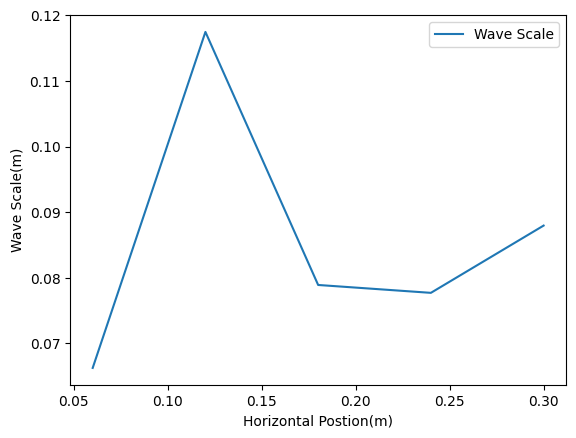

In [168]:
plt.figure()

plt.plot(xlist, delta_list, label = 'Wave Scale')

plt.xlabel('Horizontal Postion(m)')
plt.ylabel('Wave Scale(m)')
plt.legend()

### (4) Wave Velocity

In [169]:
t_crit_list = np.array([0.2, 0.13333, 0.1, 0.03333, 0])

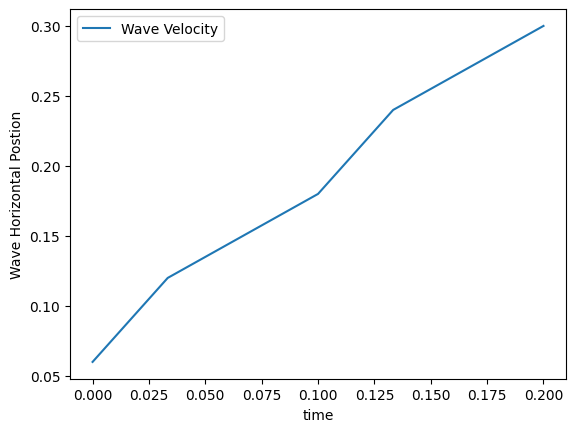

In [170]:
plt.figure()

plt.plot(t_crit_list, xlist, label = 'Wave Velocity')

plt.xlabel('time')
plt.ylabel('Wave Horizontal Postion')
plt.legend()

In [171]:
def func(t, b, a):
    return b + a * t
popt, pcov = curve_fit(func, t_crit_list, xlist, p0 = [0, 0.1])

In [172]:
popt

array([0.06947584, 1.18420429])

Text(0, 0.5, 'Horizontal Position')

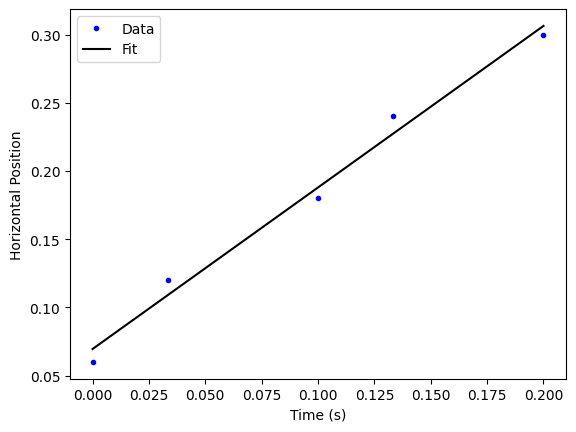

In [173]:
# Wave Velocity is 0.006 m/s

fig, ax = plt.subplots(1, 1)
ax.plot(t_crit_list, xlist, marker='.', lw=0, label = 'Data', color='blue')
ax.plot(t_crit_list, func(t_crit_list, popt[0], popt[1]), label = 'Fit', color='black')
ax.legend()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Horizontal Position')

## 4) Short Metal Longwave (L = 60cm)

### (1) Plot

In [174]:
# Constant

l = 0.6

In [175]:
tlist = np.array([0.0, 0.03333, 0.06667, 0.1, 0.13333, 0.16667, 0.2, 0.23333, 0.26667, 0.3, 0.33333, 0.36667, 0.4, 0.43333, 0.46667, 0.5, 0.53333, 0.56667, 0.6, 0.63333, 0.66667, 0.7, 0.73333, 0.76667, 0.8, 0.83333, 0.86667, 0.9, 0.93333, 0.96667, 1.0, 1.03333, 1.06667, 1.1, 1.13333, 1.16667, 1.2, 1.23333, 1.26667, 1.3, 1.33333, 1.36667, 1.4, 1.43333, 1.46667, 1.5, 1.53333, 1.56667, 1.6, 1.63333, 1.66667, 1.7, 1.73333, 1.76667, 1.8, 1.83333, 1.86667, 1.9, 1.93, 1.97])
ylist1 = np.array([0.17817, 0.18025, 0.18233, 0.18337, 0.19014, 0.19326, 0.19832, 0.20051, 0.20197, 0.20372, 0.2069, 0.20722, 0.20927, 0.21094, 0.21423, 0.21555, 0.21581, 0.21598, 0.21609, 0.21685, 0.21945, 0.21971, 0.22182, 0.22283, 0.22361, 0.22529, 0.22551, 0.22561, 0.22881, 0.22881, 0.23087, 0.23089, 0.23401, 0.23437, 0.23521, 0.23784, 0.23991, 0.24051, 0.24077, 0.24129, 0.24255, 0.244, 0.24441, 0.24525, 0.24546, 0.24711, 0.24721, 0.24831, 0.24831, 0.24984, 0.25091, 0.251, 0.25143, 0.25481, 0.25585, 0.25597, 0.25611, 0.25819, 0.25845, 0.25923])
ylist2 = np.array([0.13, 0.12922, 0.12974, 0.12922, 0.1287, 0.12142, 0.11206, 0.09568, 0.08164, 0.07228, 0.06916, 0.06968, 0.07358, 0.0793, 0.08502, 0.09178, 0.0988, 0.10686, 0.11544, 0.12064, 0.12246, 0.1196, 0.11752, 0.1131, 0.1066, 0.10088, 0.0923, 0.08684, 0.08762, 0.0923, 0.09698, 0.10426, 0.11284, 0.1222, 0.13078, 0.13546, 0.1404, 0.13988, 0.13806, 0.13572, 0.13208, 0.12532, 0.1183, 0.10972, 0.10426, 0.10374, 0.10556, 0.10842, 0.11206, 0.11544, 0.1209, 0.12428, 0.1274, 0.1287, 0.12974, 0.13052, 0.12922, 0.12298, 0.11505, 0.10569])
ylist3 = np.array([0.01459, 0.0143, 0.01459, 0.01401, 0.01415, 0.01401, 0.01386, 0.01255, 0.007, -0.0054, -0.01853, -0.03079, -0.039, -0.04082, -0.04056, -0.03848, -0.03562, -0.03146, -0.02626, -0.02184, -0.01638, -0.00962, -0.00572, -0.00468, -0.00416, -0.00494, -0.00416, -0.00312, -0.00338, -0.00546, -0.00754, -0.00754, -0.0065, -0.00442, 0.00026, 0.0039, 0.00832, 0.01248, 0.0143, 0.01508, 0.0143, 0.0143, 0.01378, 0.01066, 0.00624, 0.00026, -0.00728, -0.01248, -0.01092, -0.01066, -0.00832, -0.00442, 0.0, 0.00078, 0.00286, 0.00364, 0.00416, 0.00468, 0.00494, 0.00494])
ylist4 = np.array([-0.11374, -0.11328, -0.11328, -0.11328, -0.11328, -0.11328, -0.11328, -0.11328, -0.11328, -0.11328, -0.11328, -0.12301, -0.13135, -0.1434, -0.1522, -0.16332, -0.16795, -0.16517, -0.16193, -0.1573, -0.15498, -0.15174, -0.14525, -0.13552, -0.1244, -0.11699, -0.11004, -0.10818, -0.10911, -0.11699, -0.1193, -0.12486, -0.12625, -0.13135, -0.12718, -0.12718, -0.12394, -0.12394, -0.12069, -0.11699, -0.11745, -0.11621, -0.11582, -0.11517, -0.11511, -0.11595, -0.11771, -0.12083, -0.12434, -0.12889, -0.13324, -0.13513, -0.1335, -0.13188, -0.1298, -0.12752, -0.12577, -0.12473, -0.12466, -0.12479])
ylist5 = np.array([-0.24664, -0.24729, -0.24727, -0.24792, -0.24749, -0.24778, -0.24814, -0.24822, -0.24851, -0.24873, -0.24902, -0.24975, -0.24975, -0.2496, -0.25362, -0.26225, -0.27499, -0.28287, -0.28889, -0.2912, -0.2846, -0.27545, -0.26758, -0.25982, -0.25322, -0.24928, -0.245, -0.24094, -0.24187, -0.24198, -0.24291, -0.24349, -0.24662, -0.24812, -0.25032, -0.25218, -0.25322, -0.25472, -0.25449, -0.25322, -0.25241, -0.2509, -0.24905, -0.24743, -0.24685, -0.24824, -0.24905, -0.24928, -0.24882, -0.24916, -0.25055, -0.25438, -0.25808, -0.25993, -0.26144, -0.25982, -0.25739, -0.25553, -0.25357, -0.25322])

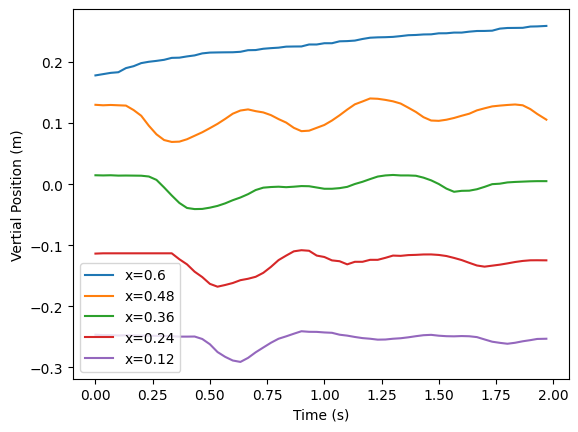

In [176]:
plt.figure()

plt.plot(tlist, ylist1, label='x={0}'.format(l*5/5))
plt.plot(tlist, ylist2, label='x={0}'.format(l*4/5))
plt.plot(tlist, ylist3, label='x={0}'.format(l*3/5))
plt.plot(tlist, ylist4, label='x={0}'.format(l*2/5))
plt.plot(tlist, ylist5, label='x={0}'.format(l*1/5))

plt.xlabel('Time (s)')
plt.ylabel('Vertial Position (m)')
plt.legend()

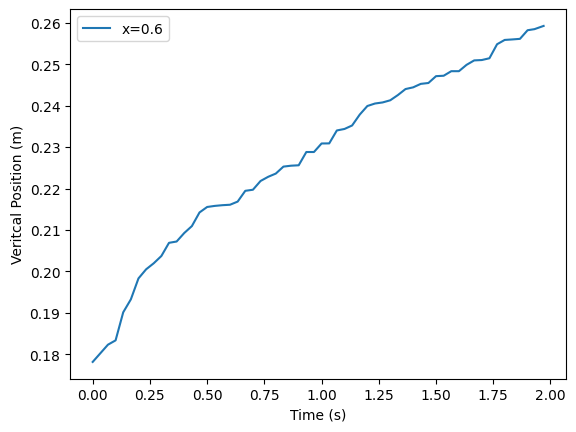

In [177]:
plt.figure()

plt.plot(tlist, ylist1, label='x={0}'.format(l*5/5))

plt.xlabel('Time (s)')
plt.ylabel('Veritcal Position (m)')
plt.legend()

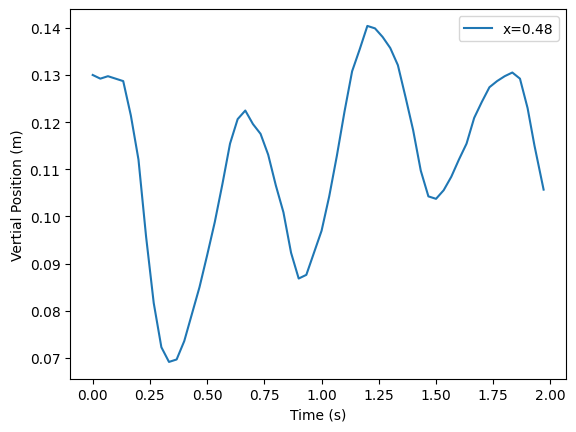

In [178]:
plt.figure()

plt.plot(tlist, ylist2, label='x={0}'.format(l*4/5))

plt.xlabel('Time (s)')
plt.ylabel('Vertial Position (m)')
plt.legend()

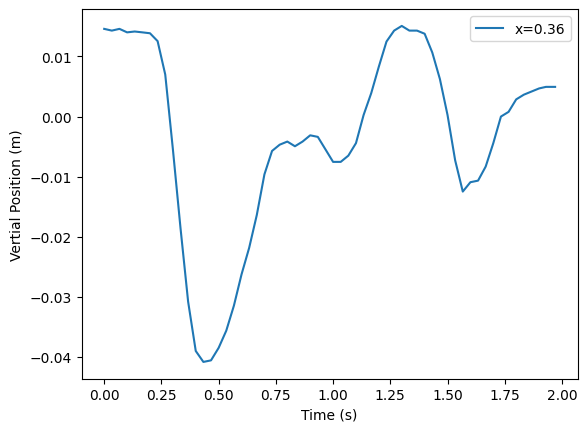

In [179]:
plt.figure()

plt.plot(tlist, ylist3, label='x={0}'.format(l*3/5))

plt.xlabel('Time (s)')
plt.ylabel('Vertial Position (m)')
plt.legend()

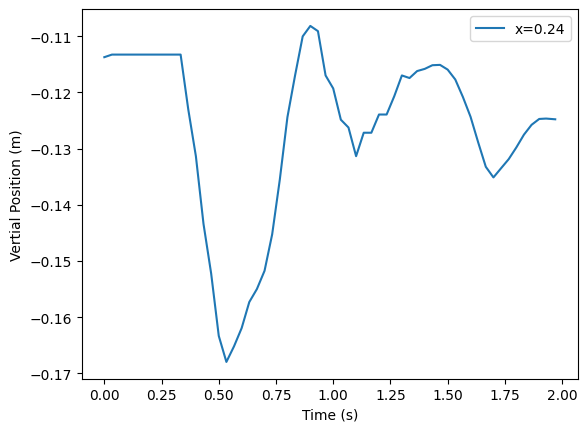

In [180]:
plt.figure()

plt.plot(tlist, ylist4, label='x={0}'.format(l*2/5))

plt.xlabel('Time (s)')
plt.ylabel('Vertial Position (m)')
plt.legend()

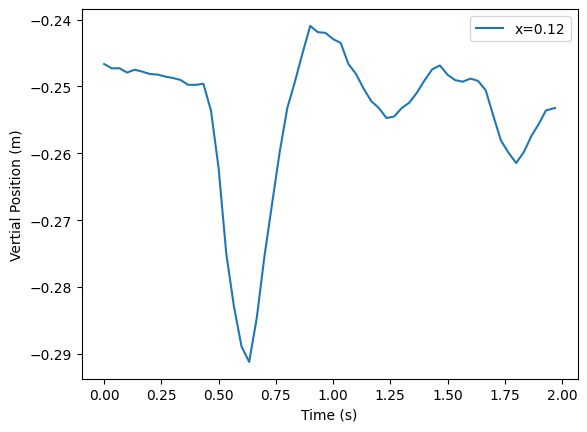

In [181]:
plt.figure()

plt.plot(tlist, ylist5, label='x={0}'.format(l*1/5))

plt.xlabel('Time (s)')
plt.ylabel('Vertial Position (m)')
plt.legend()

### (2) FFT

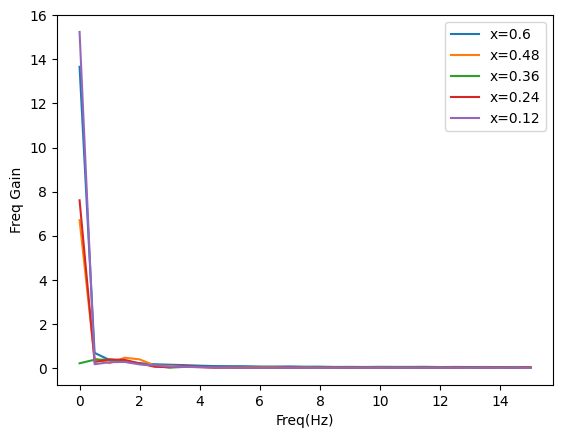

In [182]:
# Forced Oscillation by 1.765 Hz

ylist1_fft = np.fft.rfft(ylist1)
ylist1_freq = np.fft.rfftfreq(len(ylist1), d=tlist[1]-tlist[0])

ylist2_fft = np.fft.rfft(ylist2)
ylist2_freq = np.fft.rfftfreq(len(ylist2), d=tlist[1]-tlist[0])

ylist3_fft = np.fft.rfft(ylist3)
ylist3_freq = np.fft.rfftfreq(len(ylist3), d=tlist[1]-tlist[0])

ylist4_fft = np.fft.rfft(ylist4)
ylist4_freq = np.fft.rfftfreq(len(ylist4), d=tlist[1]-tlist[0])

ylist5_fft = np.fft.rfft(ylist5)
ylist5_freq = np.fft.rfftfreq(len(ylist5), d=tlist[1]-tlist[0])

plt.figure()

plt.plot(ylist1_freq, np.abs(ylist1_fft), label='x={0}'.format(l*5/5))
plt.plot(ylist2_freq, np.abs(ylist2_fft), label='x={0}'.format(l*4/5))
plt.plot(ylist3_freq, np.abs(ylist3_fft), label='x={0}'.format(l*3/5))
plt.plot(ylist4_freq, np.abs(ylist4_fft), label='x={0}'.format(l*2/5))
plt.plot(ylist5_freq, np.abs(ylist5_fft), label='x={0}'.format(l*1/5))

plt.xlabel('Freq(Hz)')
plt.ylabel('Freq Gain')
plt.legend()

### (3) Wave Scale

In [183]:
delta_lst = []


max = ylist1[0]
min = ylist1[0]

for j in range(len(tlist)):
  if (ylist1[j] > max):
    max = ylist1[j]
  if (ylist1[j] < min):
    min = ylist1[j]

delta_lst.append(max - min)


max = ylist2[0]
min = ylist2[0]

for j in range(len(tlist)):
  if (ylist2[j] > max):
    max = ylist2[j]
  if (ylist2[j] < min):
    min = ylist2[j]

delta_lst.append(max - min)


max = ylist3[0]
min = ylist3[0]

for j in range(len(tlist)):
  if (ylist3[j] > max):
    max = ylist3[j]
  if (ylist3[j] < min):
    min = ylist3[j]

delta_lst.append(max - min)


max = ylist4[0]
min = ylist4[0]

for j in range(len(tlist)):
  if (ylist4[j] > max):
    max = ylist4[j]
  if (ylist4[j] < min):
    min = ylist4[j]

delta_lst.append(max - min)


max = ylist5[0]
min = ylist5[0]

for j in range(len(tlist)):
  if (ylist5[j] > max):
    max = ylist5[j]
  if (ylist5[j] < min):
    min = ylist5[j]

delta_lst.append(max - min)


delta_list = np.array(delta_lst)
xlist = np.array([l*(5-i)/5 for i in range(5)])

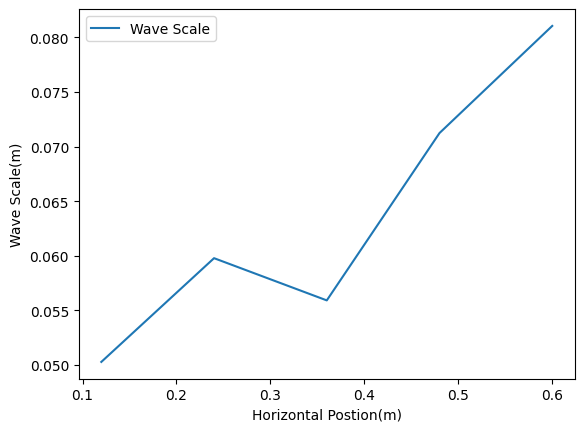

In [184]:
plt.figure()

plt.plot(xlist, delta_list, label = 'Wave Scale')

plt.xlabel('Horizontal Postion(m)')
plt.ylabel('Wave Scale(m)')
plt.legend()

### (4) Wave Velocity

In [185]:
t_crit_list = np.array([0.4, 0.3, 0.23333, 0.13333, 0])

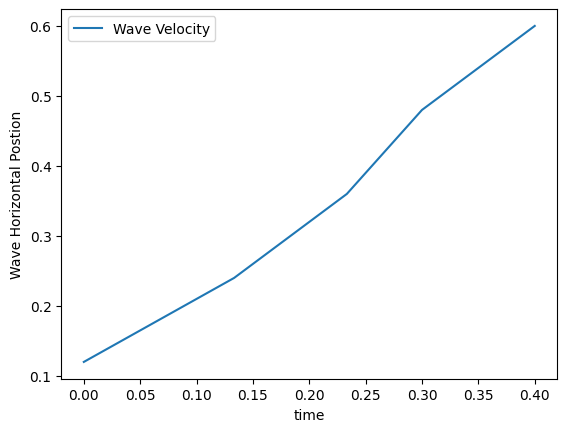

In [186]:
plt.figure()

plt.plot(t_crit_list, xlist, label = 'Wave Velocity')

plt.xlabel('time')
plt.ylabel('Wave Horizontal Postion')
plt.legend()

In [187]:
def func(t, b, a):
    return b + a * t
popt, pcov = curve_fit(func, t_crit_list, xlist, p0 = [0, 0.1])

In [188]:
popt

array([0.09859339, 1.22535116])

Text(0, 0.5, 'Horizontal Position')

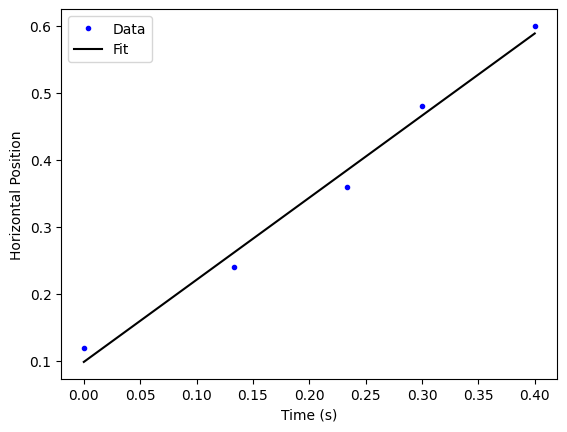

In [189]:
# Wave Velocity is 0.006 m/s

fig, ax = plt.subplots(1, 1)
ax.plot(t_crit_list, xlist, marker='.', lw=0, label = 'Data', color='blue')
ax.plot(t_crit_list, func(t_crit_list, popt[0], popt[1]), label = 'Fit', color='black')
ax.legend()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Horizontal Position')

## 5) Short Plastic Longwave (L = 60cm)

### (1) Plot

In [190]:
# Constant

l = 0.6

In [191]:
tlist = np.array([0.0, 0.03333, 0.06667, 0.1, 0.13333, 0.16667, 0.2, 0.23333, 0.26667, 0.3, 0.33333, 0.36667, 0.4, 0.43333, 0.46667, 0.5, 0.53333, 0.56667, 0.6, 0.63333, 0.66667, 0.7, 0.73333, 0.76667, 0.8, 0.83333, 0.86667, 0.9, 0.93333, 0.96667, 1.0, 1.03333, 1.06667, 1.1, 1.13333, 1.16667, 1.2, 1.23333, 1.26667, 1.3, 1.33333, 1.36667, 1.4, 1.43333, 1.46667, 1.5, 1.53333, 1.56667, 1.6, 1.63333, 1.66667, 1.7, 1.73333, 1.76667, 1.8, 1.83333, 1.86667, 1.9, 1.93333, 1.96667, 2.0])
ylist1 = np.array([0.22664, 0.22475, 0.2145, 0.20238, 0.1881, 0.17119, 0.15987, 0.15292, 0.1492, 0.15267, 0.15888, 0.16757, 0.17799, 0.18991, 0.20182, 0.21126, 0.22119, 0.2264, 0.22938, 0.22665, 0.22069, 0.212, 0.19984, 0.18867, 0.17824, 0.17129, 0.16781, 0.17104, 0.1765, 0.18718, 0.20108, 0.21722, 0.23137, 0.24576, 0.2542, 0.25892, 0.25545, 0.24651, 0.23608, 0.22293, 0.21151, 0.20133, 0.19562, 0.19438, 0.1981, 0.2053, 0.21771, 0.23087, 0.24452, 0.25892, 0.26711, 0.26935, 0.26463, 0.2547, 0.24403, 0.23037, 0.21722, 0.20853, 0.2053, 0.20952, 0.21746])
ylist2 = np.array([0.10906, 0.10827, 0.10813, 0.1066, 0.10131, 0.09197, 0.08316, 0.07149, 0.0566, 0.05015, 0.04617, 0.04369, 0.04816, 0.05561, 0.0638, 0.07224, 0.07869, 0.08564, 0.09111, 0.09359, 0.09533, 0.09384, 0.0921, 0.08664, 0.08018, 0.07522, 0.06703, 0.06479, 0.06703, 0.06852, 0.071, 0.07894, 0.08763, 0.09955, 0.11246, 0.12214, 0.13083, 0.1343, 0.13281, 0.12636, 0.11941, 0.10824, 0.09905, 0.09086, 0.08639, 0.0844, 0.08838, 0.09557, 0.10203, 0.1127, 0.12313, 0.13232, 0.13976, 0.142, 0.13604, 0.12834, 0.11866, 0.10724, 0.09582, 0.0916, 0.09185])
ylist3 = np.array([-0.01514, -0.01465, -0.01415, -0.0144, -0.01564, -0.01564, -0.01638, -0.01812, -0.02582, -0.03972, -0.05337, -0.06181, -0.06479, -0.06454, -0.06479, -0.06181, -0.05859, -0.05511, -0.04841, -0.04319, -0.03848, -0.03302, -0.03351, -0.03153, -0.0288, -0.0278, -0.02904, -0.03426, -0.03823, -0.04046, -0.04171, -0.04096, -0.04022, -0.03823, -0.03178, -0.02458, -0.01614, -0.00496, 0.00323, 0.00546, 0.00397, 0.00472, 0.00174, -0.00447, -0.01266, -0.01936, -0.02408, -0.02532, -0.02358, -0.02358, -0.02135, -0.01688, -0.00844, 0.00099, 0.00521, 0.00571, 0.00521, 0.00372, -0.00099, -0.00695, -0.01465])
ylist4 = np.array([-0.1564, -0.15706, -0.1564, -0.15684, -0.1564, -0.15573, -0.15617, -0.15662, -0.15706, -0.15728, -0.16082, -0.16989, -0.18294, -0.19289, -0.19754, -0.19798, -0.19643, -0.19688, -0.19466, -0.19157, -0.18714, -0.17852, -0.17077, -0.16303, -0.15993, -0.16082, -0.16193, -0.16038, -0.1606, -0.16237, -0.16546, -0.16746, -0.16923, -0.17033, -0.16945, -0.16812, -0.16635, -0.1617, -0.15595, -0.14865, -0.14025, -0.13516, -0.13693, -0.13848, -0.13848, -0.14025, -0.14511, -0.15153, -0.15949, -0.16237, -0.16259, -0.16148, -0.16082, -0.15905, -0.15463, -0.14644, -0.1387, -0.13516, -0.13427, -0.1356, -0.13649])
ylist5 = np.array([-0.305, -0.30503, -0.30587, -0.30559, -0.30559, -0.30475, -0.30503, -0.30503, -0.30503, -0.30503, -0.30475, -0.30448, -0.30448, -0.30754, -0.3159, -0.32482, -0.33262, -0.33151, -0.32816, -0.32371, -0.31757, -0.31507, -0.31256, -0.31061, -0.30893, -0.30559, -0.30392, -0.30392, -0.30559, -0.30559, -0.3042, -0.30615, -0.30615, -0.30782, -0.3081, -0.30921, -0.30782, -0.30782, -0.30838, -0.30726, -0.30671, -0.30169, -0.29472, -0.28998, -0.28887, -0.28998, -0.29166, -0.29249, -0.29639, -0.30057, -0.30643, -0.30977, -0.30782, -0.3042, -0.30169, -0.30057, -0.29862, -0.29444, -0.28915, -0.28385, -0.28441])

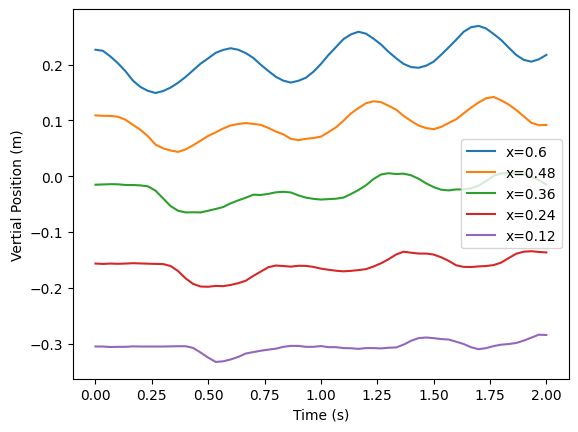

In [192]:
plt.figure()

plt.plot(tlist, ylist1, label='x={0}'.format(l*5/5))
plt.plot(tlist, ylist2, label='x={0}'.format(l*4/5))
plt.plot(tlist, ylist3, label='x={0}'.format(l*3/5))
plt.plot(tlist, ylist4, label='x={0}'.format(l*2/5))
plt.plot(tlist, ylist5, label='x={0}'.format(l*1/5))

plt.xlabel('Time (s)')
plt.ylabel('Vertial Position (m)')
plt.legend()

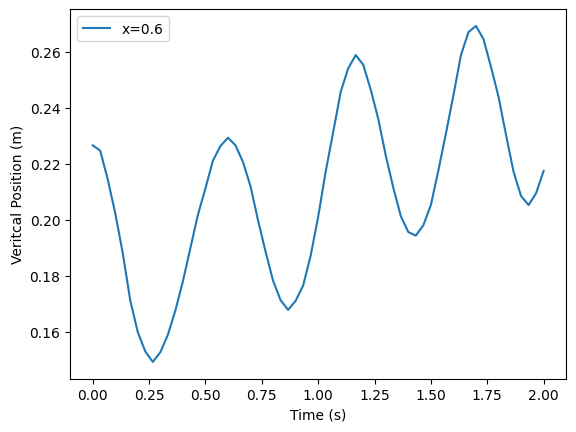

In [193]:
plt.figure()

plt.plot(tlist, ylist1, label='x={0}'.format(l*5/5))

plt.xlabel('Time (s)')
plt.ylabel('Veritcal Position (m)')
plt.legend()

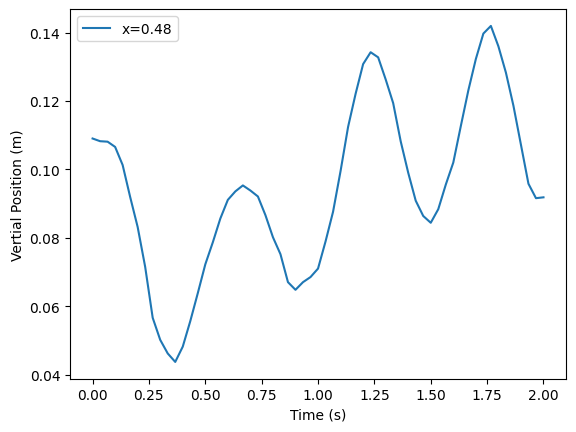

In [194]:
plt.figure()

plt.plot(tlist, ylist2, label='x={0}'.format(l*4/5))

plt.xlabel('Time (s)')
plt.ylabel('Vertial Position (m)')
plt.legend()

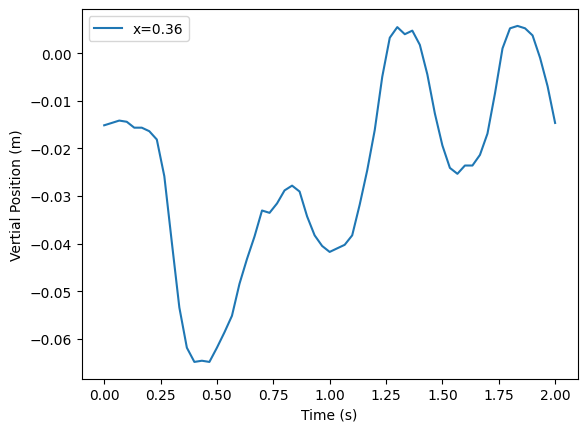

In [195]:
plt.figure()

plt.plot(tlist, ylist3, label='x={0}'.format(l*3/5))

plt.xlabel('Time (s)')
plt.ylabel('Vertial Position (m)')
plt.legend()

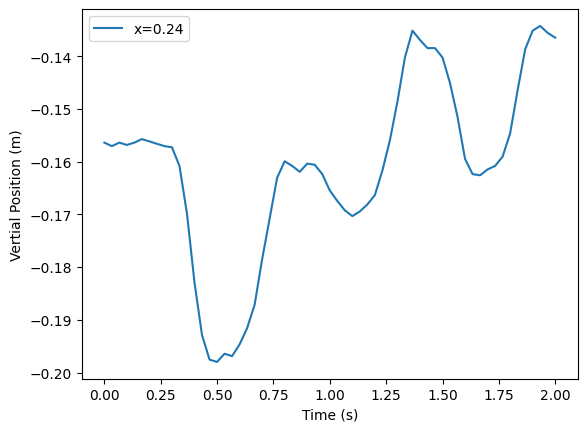

In [196]:
plt.figure()

plt.plot(tlist, ylist4, label='x={0}'.format(l*2/5))

plt.xlabel('Time (s)')
plt.ylabel('Vertial Position (m)')
plt.legend()

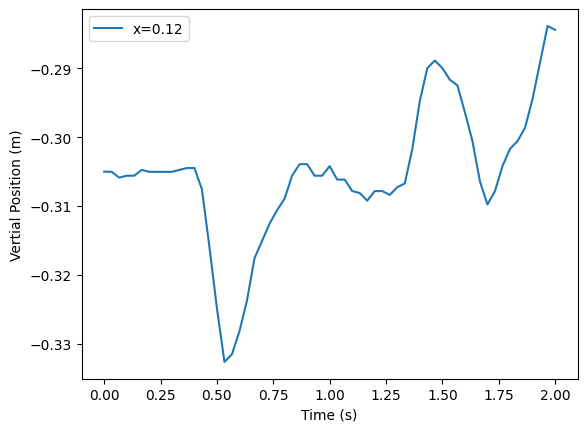

In [197]:
plt.figure()

plt.plot(tlist, ylist5, label='x={0}'.format(l*1/5))

plt.xlabel('Time (s)')
plt.ylabel('Vertial Position (m)')
plt.legend()

### (2) FFT

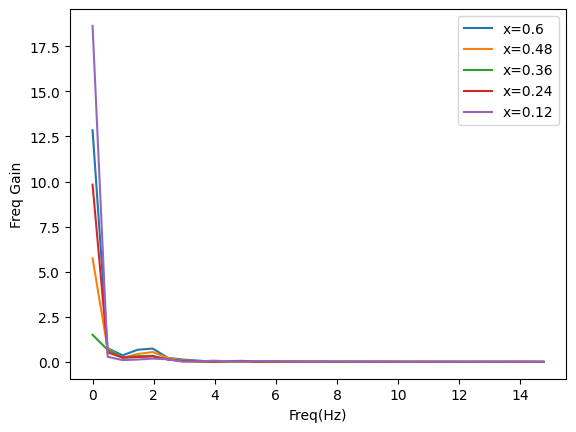

In [198]:
# Forced Oscillation by 1.765 Hz

ylist1_fft = np.fft.rfft(ylist1)
ylist1_freq = np.fft.rfftfreq(len(ylist1), d=tlist[1]-tlist[0])

ylist2_fft = np.fft.rfft(ylist2)
ylist2_freq = np.fft.rfftfreq(len(ylist2), d=tlist[1]-tlist[0])

ylist3_fft = np.fft.rfft(ylist3)
ylist3_freq = np.fft.rfftfreq(len(ylist3), d=tlist[1]-tlist[0])

ylist4_fft = np.fft.rfft(ylist4)
ylist4_freq = np.fft.rfftfreq(len(ylist4), d=tlist[1]-tlist[0])

ylist5_fft = np.fft.rfft(ylist5)
ylist5_freq = np.fft.rfftfreq(len(ylist5), d=tlist[1]-tlist[0])

plt.figure()

plt.plot(ylist1_freq, np.abs(ylist1_fft), label='x={0}'.format(l*5/5))
plt.plot(ylist2_freq, np.abs(ylist2_fft), label='x={0}'.format(l*4/5))
plt.plot(ylist3_freq, np.abs(ylist3_fft), label='x={0}'.format(l*3/5))
plt.plot(ylist4_freq, np.abs(ylist4_fft), label='x={0}'.format(l*2/5))
plt.plot(ylist5_freq, np.abs(ylist5_fft), label='x={0}'.format(l*1/5))

plt.xlabel('Freq(Hz)')
plt.ylabel('Freq Gain')
plt.legend()

### (3) Wave Scale

In [199]:
delta_lst = []


max = ylist1[0]
min = ylist1[0]

for j in range(len(tlist)):
  if (ylist1[j] > max):
    max = ylist1[j]
  if (ylist1[j] < min):
    min = ylist1[j]

delta_lst.append(max - min)


max = ylist2[0]
min = ylist2[0]

for j in range(len(tlist)):
  if (ylist2[j] > max):
    max = ylist2[j]
  if (ylist2[j] < min):
    min = ylist2[j]

delta_lst.append(max - min)


max = ylist3[0]
min = ylist3[0]

for j in range(len(tlist)):
  if (ylist3[j] > max):
    max = ylist3[j]
  if (ylist3[j] < min):
    min = ylist3[j]

delta_lst.append(max - min)


max = ylist4[0]
min = ylist4[0]

for j in range(len(tlist)):
  if (ylist4[j] > max):
    max = ylist4[j]
  if (ylist4[j] < min):
    min = ylist4[j]

delta_lst.append(max - min)


max = ylist5[0]
min = ylist5[0]

for j in range(len(tlist)):
  if (ylist5[j] > max):
    max = ylist5[j]
  if (ylist5[j] < min):
    min = ylist5[j]

delta_lst.append(max - min)


delta_list = np.array(delta_lst)
xlist = np.array([l*(5-i)/5 for i in range(5)])

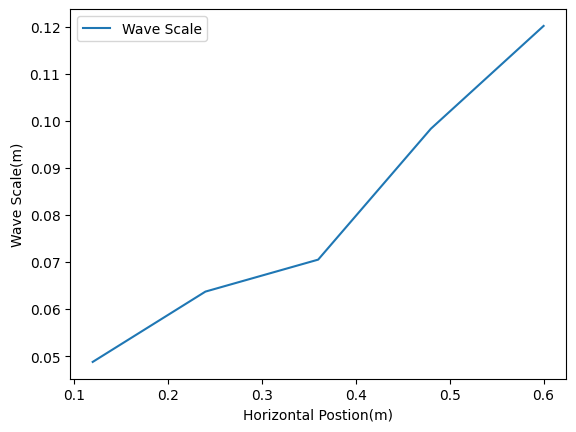

In [200]:
plt.figure()

plt.plot(xlist, delta_list, label = 'Wave Scale')

plt.xlabel('Horizontal Postion(m)')
plt.ylabel('Wave Scale(m)')
plt.legend()

### (4) Wave Velocity

In [201]:
t_crit_list = np.array([0.36667, 0.3, 0.26667, 0.13333, 0.03333])

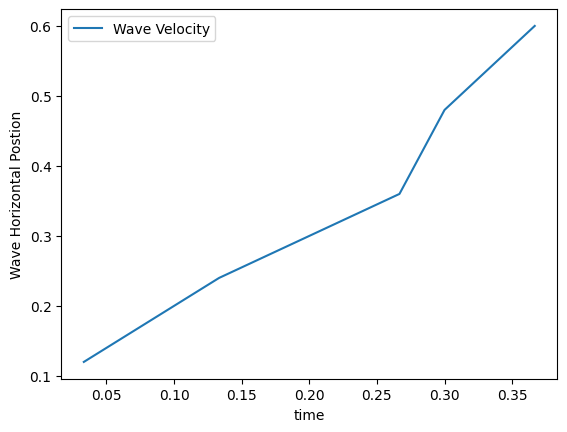

In [202]:
plt.figure()

plt.plot(t_crit_list, xlist, label = 'Wave Velocity')

plt.xlabel('time')
plt.ylabel('Wave Horizontal Postion')
plt.legend()

In [203]:
def func(t, b, a):
    return b + a * t
popt, pcov = curve_fit(func, t_crit_list, xlist, p0 = [0, 0.1])

In [204]:
popt

array([0.05632599, 1.38033642])

Text(0, 0.5, 'Horizontal Position')

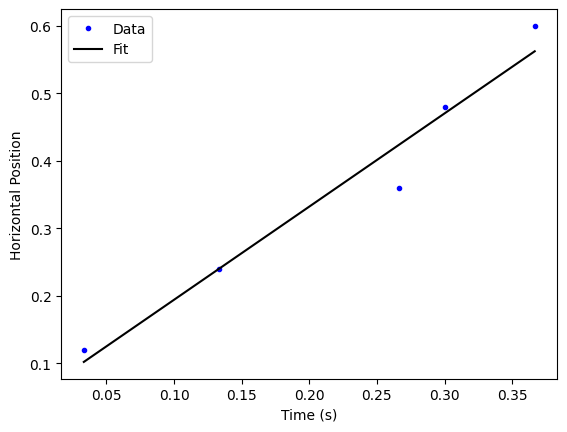

In [205]:
# Wave Velocity is 0.006 m/s

fig, ax = plt.subplots(1, 1)
ax.plot(t_crit_list, xlist, marker='.', lw=0, label = 'Data', color='blue')
ax.plot(t_crit_list, func(t_crit_list, popt[0], popt[1]), label = 'Fit', color='black')
ax.legend()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Horizontal Position')

## 6) Short Plastic Longwave (L = 30cm)

### (1) Plot

In [206]:
# Constant

l = 0.3

In [207]:
tlist = np.array([0.0, 0.03333, 0.06667, 0.1, 0.13333, 0.16667, 0.2, 0.23333, 0.26667, 0.3, 0.33333, 0.36667, 0.4, 0.43333, 0.46667, 0.5, 0.53333, 0.56667, 0.6, 0.63333, 0.66667, 0.7, 0.73333, 0.76667, 0.8, 0.83333, 0.86667, 0.9, 0.93333, 0.96667, 1.0, 1.03333, 1.06667, 1.1, 1.13333, 1.16667, 1.2, 1.23333, 1.26667, 1.3, 1.33333, 1.36667, 1.4, 1.43333, 1.46667, 1.5, 1.53333, 1.56667, 1.6, 1.63333, 1.66667, 1.7, 1.73333, 1.76667, 1.8, 1.83333, 1.86667, 1.9, 1.93333, 1.96667, 2.0])
ylist1 = np.array([0.09176, 0.09139, 0.08551, 0.07815, 0.06785, 0.05498, 0.04432, 0.03843, 0.03475, 0.0399, 0.04616, 0.05645, 0.06969, 0.07999, 0.08698, 0.08882, 0.08661, 0.07999, 0.07043, 0.06197, 0.05241, 0.04652, 0.04395, 0.04395, 0.05094, 0.06087, 0.07043, 0.08073, 0.09029, 0.0947, 0.09691, 0.09433, 0.08551, 0.07521, 0.06712, 0.05756, 0.05167, 0.04763, 0.05094, 0.05719, 0.06749, 0.07742, 0.08771, 0.09617, 0.10095, 0.09654, 0.08698, 0.07815, 0.06602, 0.05388, 0.04763, 0.04505, 0.04763, 0.05094, 0.06087, 0.07043, 0.07521, 0.08404, 0.08808, 0.08698, 0.0789])
ylist2 = np.array([0.01269, 0.01269, 0.01269, 0.01416, 0.00975, 0.00423, -0.00386, -0.0171, -0.03108, -0.03439, -0.03475, -0.03108, -0.02372, -0.0124, -0.00102, 0.01313, 0.02189, 0.02262, 0.01838, 0.01459, 0.00598, -0.0019, -0.01328, -0.02014, -0.01941, -0.01561, -0.01138, -0.00452, 0.00423, 0.01372, 0.02057, 0.02641, 0.02597, 0.0213, 0.0159, 0.00554, -0.00438, -0.01342, -0.01766, -0.01722, -0.01517, -0.00919, 0.0, 0.01051, 0.02057, 0.0286, 0.03137, 0.0286, 0.02378, 0.01299, -0.00029, -0.01196, -0.01955, -0.02028, -0.01795, -0.01415, -0.00803, -0.00029, 0.00875, 0.01357, 0.0171])
ylist3 = np.array([-0.05449, -0.05408, -0.05408, -0.05428, -0.05449, -0.05387, -0.0549, -0.05697, -0.06584, -0.07554, -0.08215, -0.08586, -0.08793, -0.08524, -0.07864, -0.07141, -0.06089, -0.05077, -0.04169, -0.03756, -0.04149, -0.04272, -0.04747, -0.05284, -0.06047, -0.06502, -0.06481, -0.06563, -0.06543, -0.06047, -0.05655, -0.05098, -0.04788, -0.04272, -0.04066, -0.04499, -0.04768, -0.05222, -0.05986, -0.06563, -0.0677, -0.06956, -0.06873, -0.06667, -0.05924, -0.05077, -0.04272, -0.03653, -0.0324, -0.03447, -0.03736, -0.04396, -0.05511, -0.06563, -0.07079, -0.07265, -0.07203, -0.07079, -0.06667, -0.0613, -0.05531])
ylist4 = np.array([-0.12673, -0.12673, -0.12652, -0.12652, -0.12755, -0.12776, -0.12838, -0.12735, -0.12735, -0.12879, -0.13354, -0.13437, -0.13953, -0.1484, -0.14964, -0.14716, -0.14221, -0.13725, -0.12693, -0.11806, -0.11042, -0.10464, -0.10671, -0.10877, -0.11187, -0.116, -0.11992, -0.12549, -0.13354, -0.13994, -0.13829, -0.13478, -0.13148, -0.12673, -0.12157, -0.11744, -0.11352, -0.1162, -0.11971, -0.12136, -0.12487, -0.13148, -0.13581, -0.13664, -0.13457, -0.13292, -0.13065, -0.12384, -0.11827, -0.11187, -0.10691, -0.10506, -0.10918, -0.11352, -0.11868, -0.12693, -0.13478, -0.14014, -0.14097, -0.13932, -0.13725])
ylist5 = np.array([-0.19443, -0.19339, -0.19278, -0.19298, -0.1936, -0.19484, -0.19443, -0.19505, -0.19422, -0.19381, -0.19525, -0.19628, -0.19608, -0.19732, -0.20041, -0.2033, -0.20392, -0.20289, -0.20103, -0.19917, -0.19484, -0.18823, -0.18204, -0.17998, -0.18225, -0.18473, -0.18844, -0.19009, -0.1936, -0.20083, -0.20289, -0.20289, -0.20124, -0.20083, -0.20021, -0.19938, -0.19401, -0.19216, -0.19133, -0.19319, -0.19505, -0.19546, -0.19422, -0.1967, -0.20021, -0.20413, -0.20206, -0.19876, -0.19587, -0.19546, -0.1936, -0.18927, -0.18555, -0.18555, -0.18762, -0.19009, -0.19401, -0.19794, -0.20206, -0.20805, -0.20991])

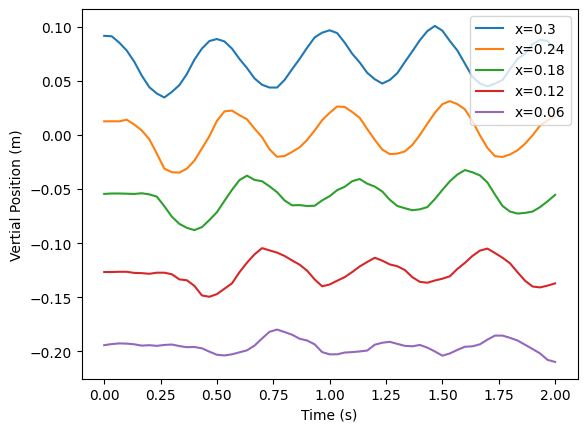

In [208]:
plt.figure()

plt.plot(tlist, ylist1, label='x={0}'.format(l*5/5))
plt.plot(tlist, ylist2, label='x={0}'.format(l*4/5))
plt.plot(tlist, ylist3, label='x={0}'.format(l*3/5))
plt.plot(tlist, ylist4, label='x={0}'.format(l*2/5))
plt.plot(tlist, ylist5, label='x={0}'.format(l*1/5))

plt.xlabel('Time (s)')
plt.ylabel('Vertial Position (m)')
plt.legend()

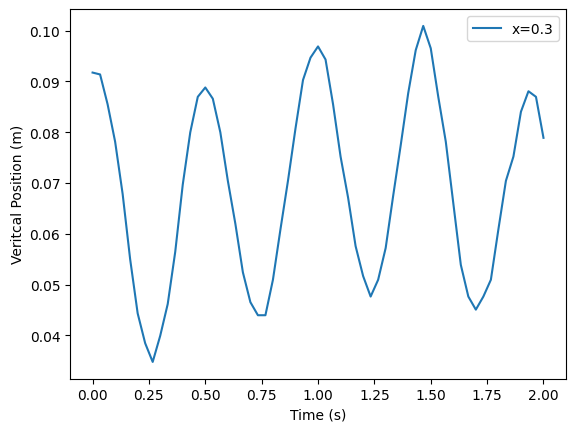

In [209]:
plt.figure()

plt.plot(tlist, ylist1, label='x={0}'.format(l*5/5))

plt.xlabel('Time (s)')
plt.ylabel('Veritcal Position (m)')
plt.legend()

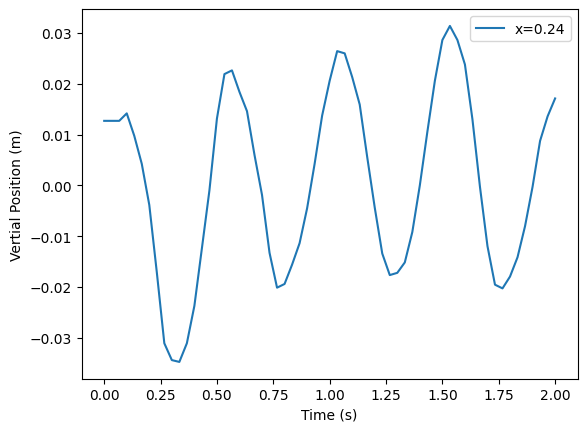

In [210]:
plt.figure()

plt.plot(tlist, ylist2, label='x={0}'.format(l*4/5))

plt.xlabel('Time (s)')
plt.ylabel('Vertial Position (m)')
plt.legend()

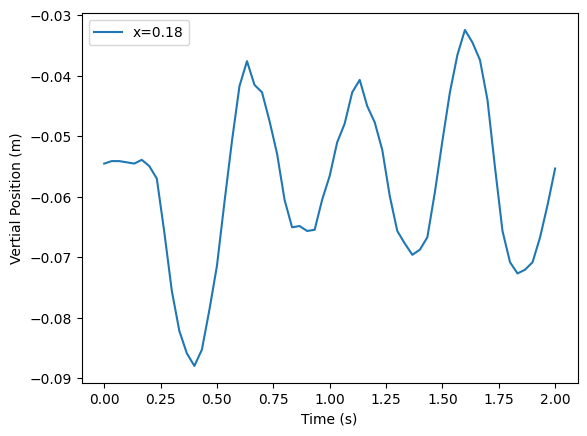

In [211]:
plt.figure()

plt.plot(tlist, ylist3, label='x={0}'.format(l*3/5))

plt.xlabel('Time (s)')
plt.ylabel('Vertial Position (m)')
plt.legend()

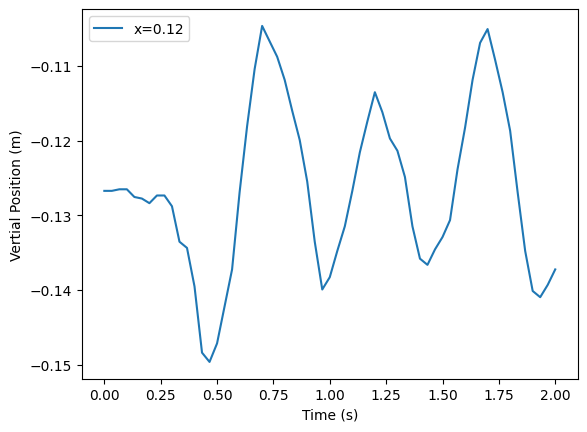

In [212]:
plt.figure()

plt.plot(tlist, ylist4, label='x={0}'.format(l*2/5))

plt.xlabel('Time (s)')
plt.ylabel('Vertial Position (m)')
plt.legend()

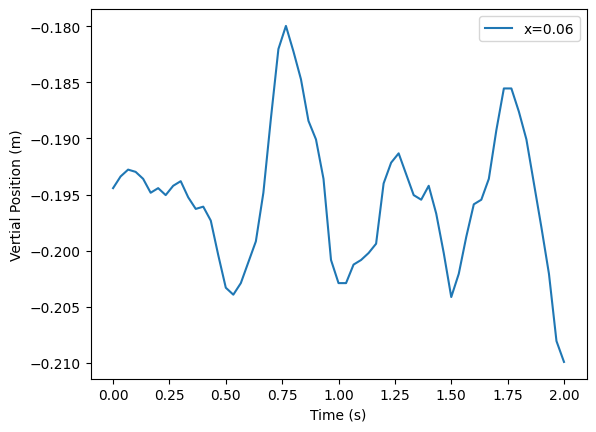

In [213]:
plt.figure()

plt.plot(tlist, ylist5, label='x={0}'.format(l*1/5))

plt.xlabel('Time (s)')
plt.ylabel('Vertial Position (m)')
plt.legend()

### (2) FFT

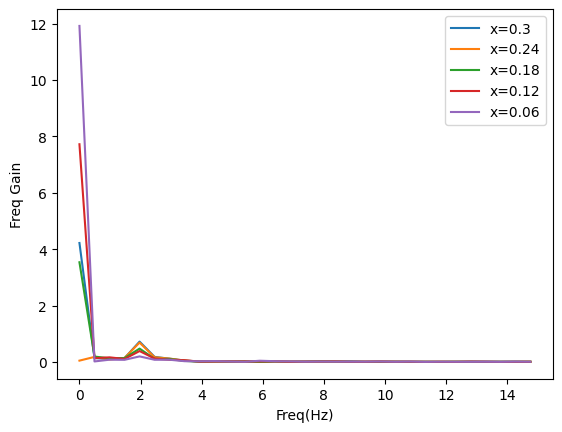

In [214]:
# Forced Oscillation by 1.765 Hz

ylist1_fft = np.fft.rfft(ylist1)
ylist1_freq = np.fft.rfftfreq(len(ylist1), d=tlist[1]-tlist[0])

ylist2_fft = np.fft.rfft(ylist2)
ylist2_freq = np.fft.rfftfreq(len(ylist2), d=tlist[1]-tlist[0])

ylist3_fft = np.fft.rfft(ylist3)
ylist3_freq = np.fft.rfftfreq(len(ylist3), d=tlist[1]-tlist[0])

ylist4_fft = np.fft.rfft(ylist4)
ylist4_freq = np.fft.rfftfreq(len(ylist4), d=tlist[1]-tlist[0])

ylist5_fft = np.fft.rfft(ylist5)
ylist5_freq = np.fft.rfftfreq(len(ylist5), d=tlist[1]-tlist[0])

plt.figure()

plt.plot(ylist1_freq, np.abs(ylist1_fft), label='x={0}'.format(l*5/5))
plt.plot(ylist2_freq, np.abs(ylist2_fft), label='x={0}'.format(l*4/5))
plt.plot(ylist3_freq, np.abs(ylist3_fft), label='x={0}'.format(l*3/5))
plt.plot(ylist4_freq, np.abs(ylist4_fft), label='x={0}'.format(l*2/5))
plt.plot(ylist5_freq, np.abs(ylist5_fft), label='x={0}'.format(l*1/5))

plt.xlabel('Freq(Hz)')
plt.ylabel('Freq Gain')
plt.legend()

### (3) Wave Scale

In [215]:
delta_lst = []


max = ylist1[0]
min = ylist1[0]

for j in range(len(tlist)):
  if (ylist1[j] > max):
    max = ylist1[j]
  if (ylist1[j] < min):
    min = ylist1[j]

delta_lst.append(max - min)


max = ylist2[0]
min = ylist2[0]

for j in range(len(tlist)):
  if (ylist2[j] > max):
    max = ylist2[j]
  if (ylist2[j] < min):
    min = ylist2[j]

delta_lst.append(max - min)


max = ylist3[0]
min = ylist3[0]

for j in range(len(tlist)):
  if (ylist3[j] > max):
    max = ylist3[j]
  if (ylist3[j] < min):
    min = ylist3[j]

delta_lst.append(max - min)


max = ylist4[0]
min = ylist4[0]

for j in range(len(tlist)):
  if (ylist4[j] > max):
    max = ylist4[j]
  if (ylist4[j] < min):
    min = ylist4[j]

delta_lst.append(max - min)


max = ylist5[0]
min = ylist5[0]

for j in range(len(tlist)):
  if (ylist5[j] > max):
    max = ylist5[j]
  if (ylist5[j] < min):
    min = ylist5[j]

delta_lst.append(max - min)


delta_list = np.array(delta_lst)
xlist = np.array([l*(5-i)/5 for i in range(5)])

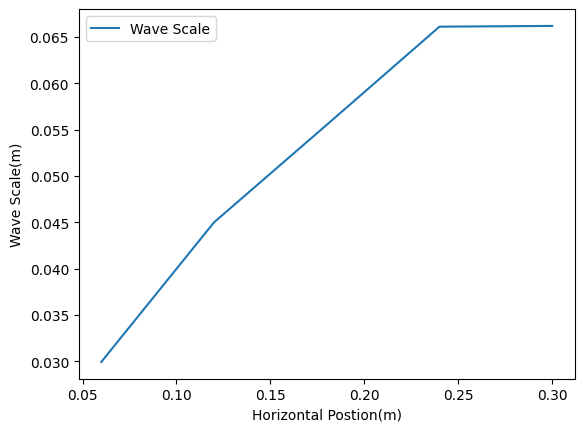

In [216]:
plt.figure()

plt.plot(xlist, delta_list, label = 'Wave Scale')

plt.xlabel('Horizontal Postion(m)')
plt.ylabel('Wave Scale(m)')
plt.legend()

### (4) Wave Velocity

In [217]:
t_crit_list = np.array([0.4, 0.3, 0.23333, 0.1, 0.03333])

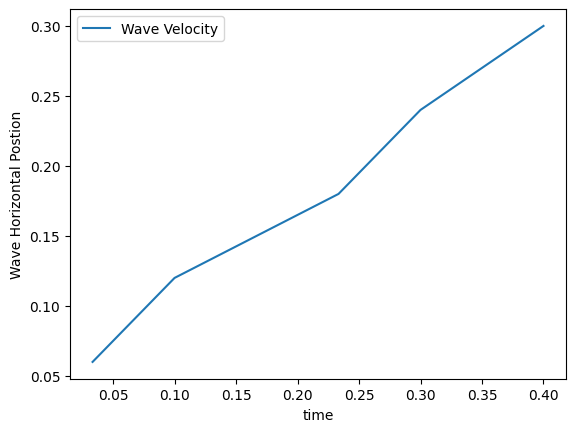

In [218]:
plt.figure()

plt.plot(t_crit_list, xlist, label = 'Wave Velocity')

plt.xlabel('time')
plt.ylabel('Wave Horizontal Postion')
plt.legend()

In [219]:
def func(t, b, a):
    return b + a * t
popt, pcov = curve_fit(func, t_crit_list, xlist, p0 = [0, 0.1])

In [220]:
popt

array([0.04424395, 0.63636047])

Text(0, 0.5, 'Horizontal Position')

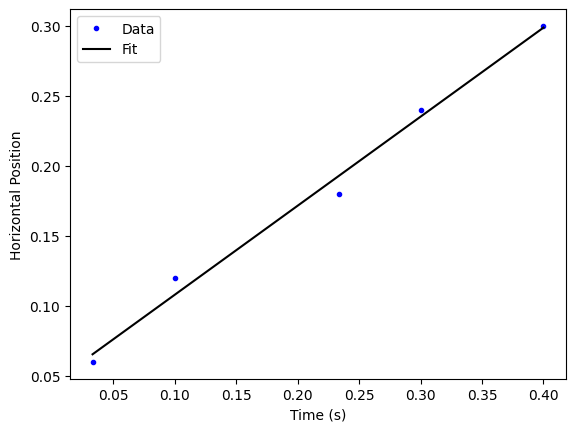

In [221]:
# Wave Velocity is 0.006 m/s

fig, ax = plt.subplots(1, 1)
ax.plot(t_crit_list, xlist, marker='.', lw=0, label = 'Data', color='blue')
ax.plot(t_crit_list, func(t_crit_list, popt[0], popt[1]), label = 'Fit', color='black')
ax.legend()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Horizontal Position')